<center><h1> <font color='white'><bold>✈️Prueba - Predicción del precio de vuelos✈️</bold></font></h1></center>

# **Punto 1**

---




## 1. Objetivo

Desarrollar un modelo predictivo capaz de estimar el precio de un boleto de avión, lo que busca ofrecer a los pasajeros tarifas competitivas y precisas.

## 2. Metodología

1. **Recolección de datos:** Obtención de un conjunto de datos relevante con información sobre vuelos y precios de boletos.
2. **Limpieza y preprocesamiento:** Eliminación de datos nulos, transformación de variables categóricas y normalización de datos numéricos.
3. **Exploración de datos:** Análisis de tendencias y correlaciones entre variables.
4. **Selección de características:** Identificación de las variables más relevantes para la predicción del precio.
5. **Entrenamiento del modelo:** Evaluación de múltiples algoritmos de Machine Learning para determinar el más adecuado.
6. **Ajuste de hiperparámetros:** Optimización del modelo mediante técnicas como Grid Search y Random Search.
7. **Evaluación del modelo:** Medición del desempeño del modelo con métricas como MAE, RMSE y R².

## 3. Variables a Considerar

| Variable           | Descripción |
|-------------------|-------------|
| 🎯Precio  | Precio del boleto de avión ***(variable objetivo)*** |
| Aerolínea  (`airline`)       | Nombre de la aerolínea |
| Origen (`from`)          | Ciudad de salida del vuelo |
| Destino  (`to`)        | Ciudad de llegada del vuelo |
| Fecha de salida (`'date'`)  | Día y hora en que sale el vuelo |
| Duración (`'time taken'`)        | Tiempo total del vuelo |
| Escalas (`'stop'`)         | Número de escalas en el viaje |

## 4. Algoritmos a Utilizar

Se evaluarán distintos modelos de Machine Learning para determinar cuál proporciona la mejor precisión en la estimación del precio del boleto:

- Regresión Lineal
- Random Forest
- XGBoost


## 5. Optimización de Modelos

Para mejorar el rendimiento de los modelos, emplearemos diferentes estrategias de optimización de hiperparámetros:

| Método              | Descripción |
|---------------------|-------------|
| **Grid Search**     | Explora todas las combinaciones posibles de hiperparámetros |
| **Random Search**   | Selecciona combinaciones aleatorias de hiperparámetros |


## 6. Conclusión

Este proyecto permitirá desarrollar un modelo predictivo que ayudará a los clientes de la agencia de viajes a estimar con mayor precisión el costo de los boletos de avión. A través de un enfoque basado en Machine Learning y técnicas de optimización, se busca maximizar la precisión del modelo para ofrecer predicciones útiles y confiables.

<br>
<br>


# Punto 2

---

#### Recollecion de datos

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

business_data_o = pd.read_excel('business.xlsx')
economy_data_o = pd.read_excel('economy.xlsx')
print("Tamaño de los Datasets")
print("business_data: ",business_data_o.shape)
print("economy_data: ",economy_data_o.shape)

Tamaño de los Datasets
business_data:  (93487, 11)
economy_data:  (206774, 11)


In [171]:
business_data_o.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


In [172]:
economy_data_o.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955


#### Análisis Exploratorio

In [173]:
def data_quality_analysis(df):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Column', 'Type', 'Unique', 'Missing'])

    columns = df.columns
    data_types = df.dtypes.to_list()
    unique_values = [df[column].nunique() for column in columns]
    missing_values = [df[column].isnull().sum() for column in columns]
    not_missing_values = [df[column].notnull().sum() for column in columns]

    result_df['Column'] = columns
    result_df['Type'] = data_types
    result_df['Unique'] = unique_values
    result_df['Missing'] = missing_values
    result_df['Not Missing'] = not_missing_values
    result_df.set_index('Column', inplace=True)

    return result_df

analysis_result_economy = data_quality_analysis(economy_data_o)
analysis_result_business = data_quality_analysis(business_data_o)
print(50*'-','\nEconomy Data')
print(analysis_result_economy.sort_values('Type'))
print(50*'-','\nBusiness Data')
print(analysis_result_business.sort_values('Type'))

-------------------------------------------------- 
Economy Data
                      Type  Unique  Missing  Not Missing
Column                                                  
date        datetime64[ns]      49        0       206774
num_code             int64    1254        0       206774
price                int64    9819        0       206774
airline             object       8        0       206774
ch_code             object       8        0       206774
dep_time            object     251        0       206774
from                object       6        0       206774
time_taken          object     483        0       206774
stop                object      37        0       206774
arr_time            object     266        0       206774
to                  object       6        0       206774
-------------------------------------------------- 
Business Data
                      Type  Unique  Missing  Not Missing
Column                                                  
date        da

### **Visualización del análisis**

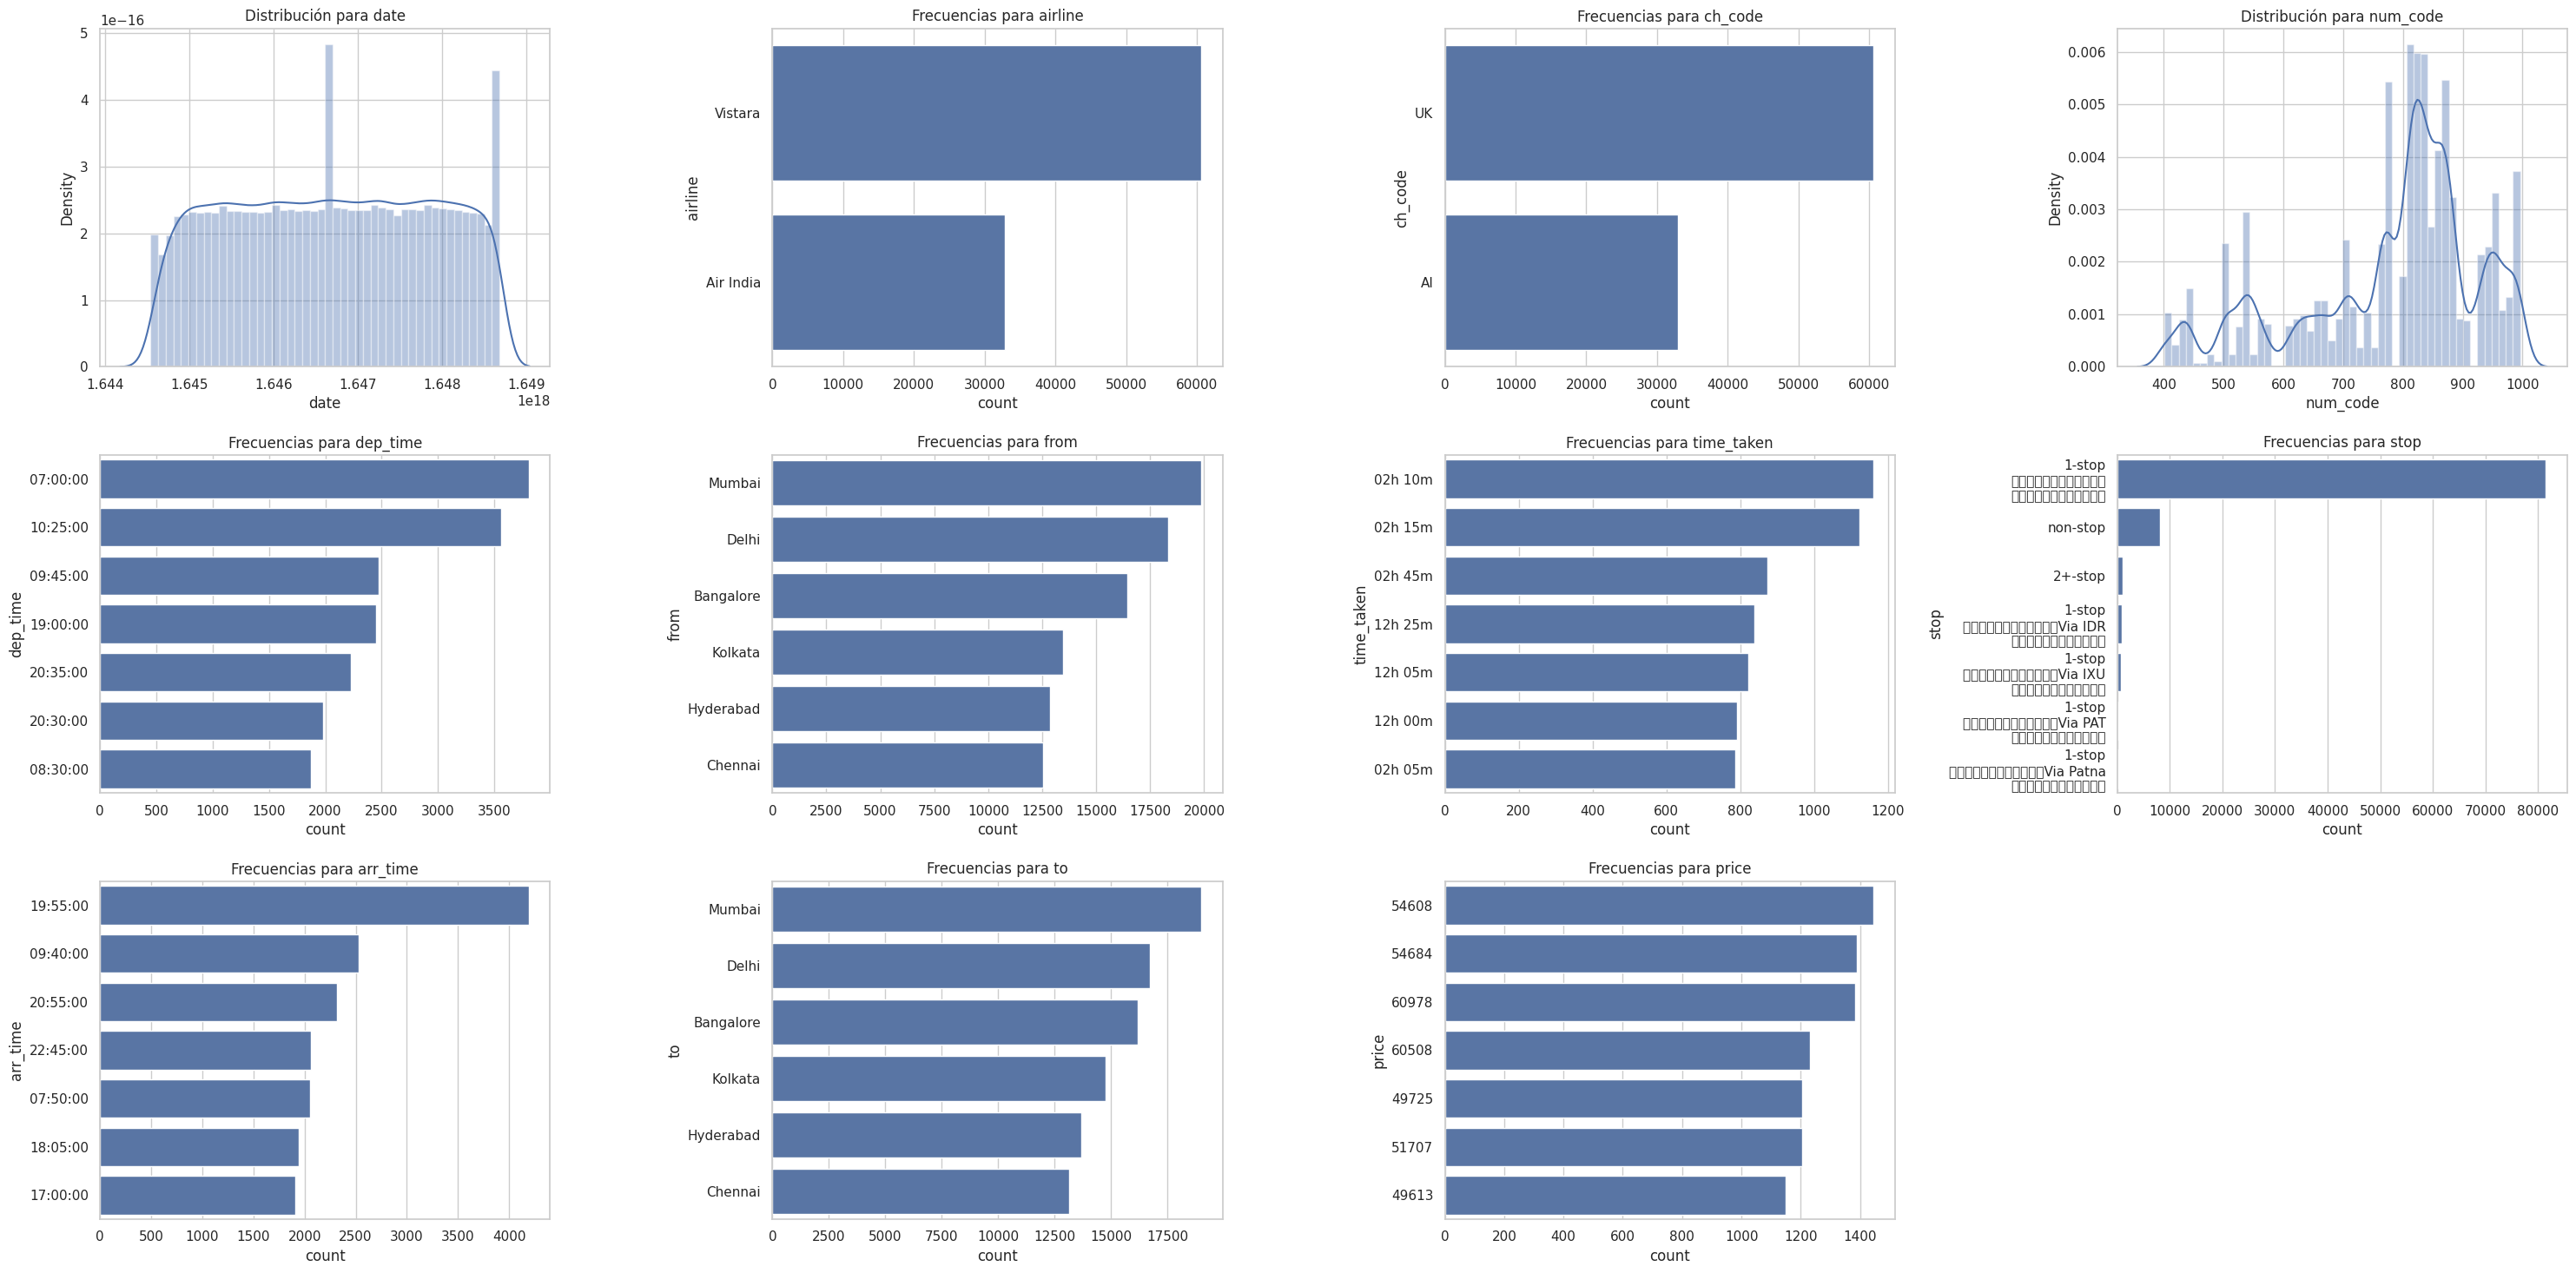

In [174]:
plt.rcParams.update({'font.size': 18})
num_cols = len(business_data_o.columns)
rows = (num_cols // 4) + (num_cols % 4 > 0)  # Calcula el número de filas necesarias

plt.figure(figsize=(30, 5 * rows))  # Ajusta la altura de la figura dinámicamente
for n, i in enumerate(list(business_data_o.columns)):
    plt.subplot(rows, 4, n + 1)
    if analysis_result_business.loc[i, 'Type']=='object':
        sns.countplot(y= business_data_o[i], order=business_data_o[i].value_counts().iloc[:7].index)
        plt.title('Frecuencias para {}'.format(i))

    else:
        sns.distplot(business_data_o[i])
        plt.title('Distribución para {}'.format(i))
    plt.tight_layout()

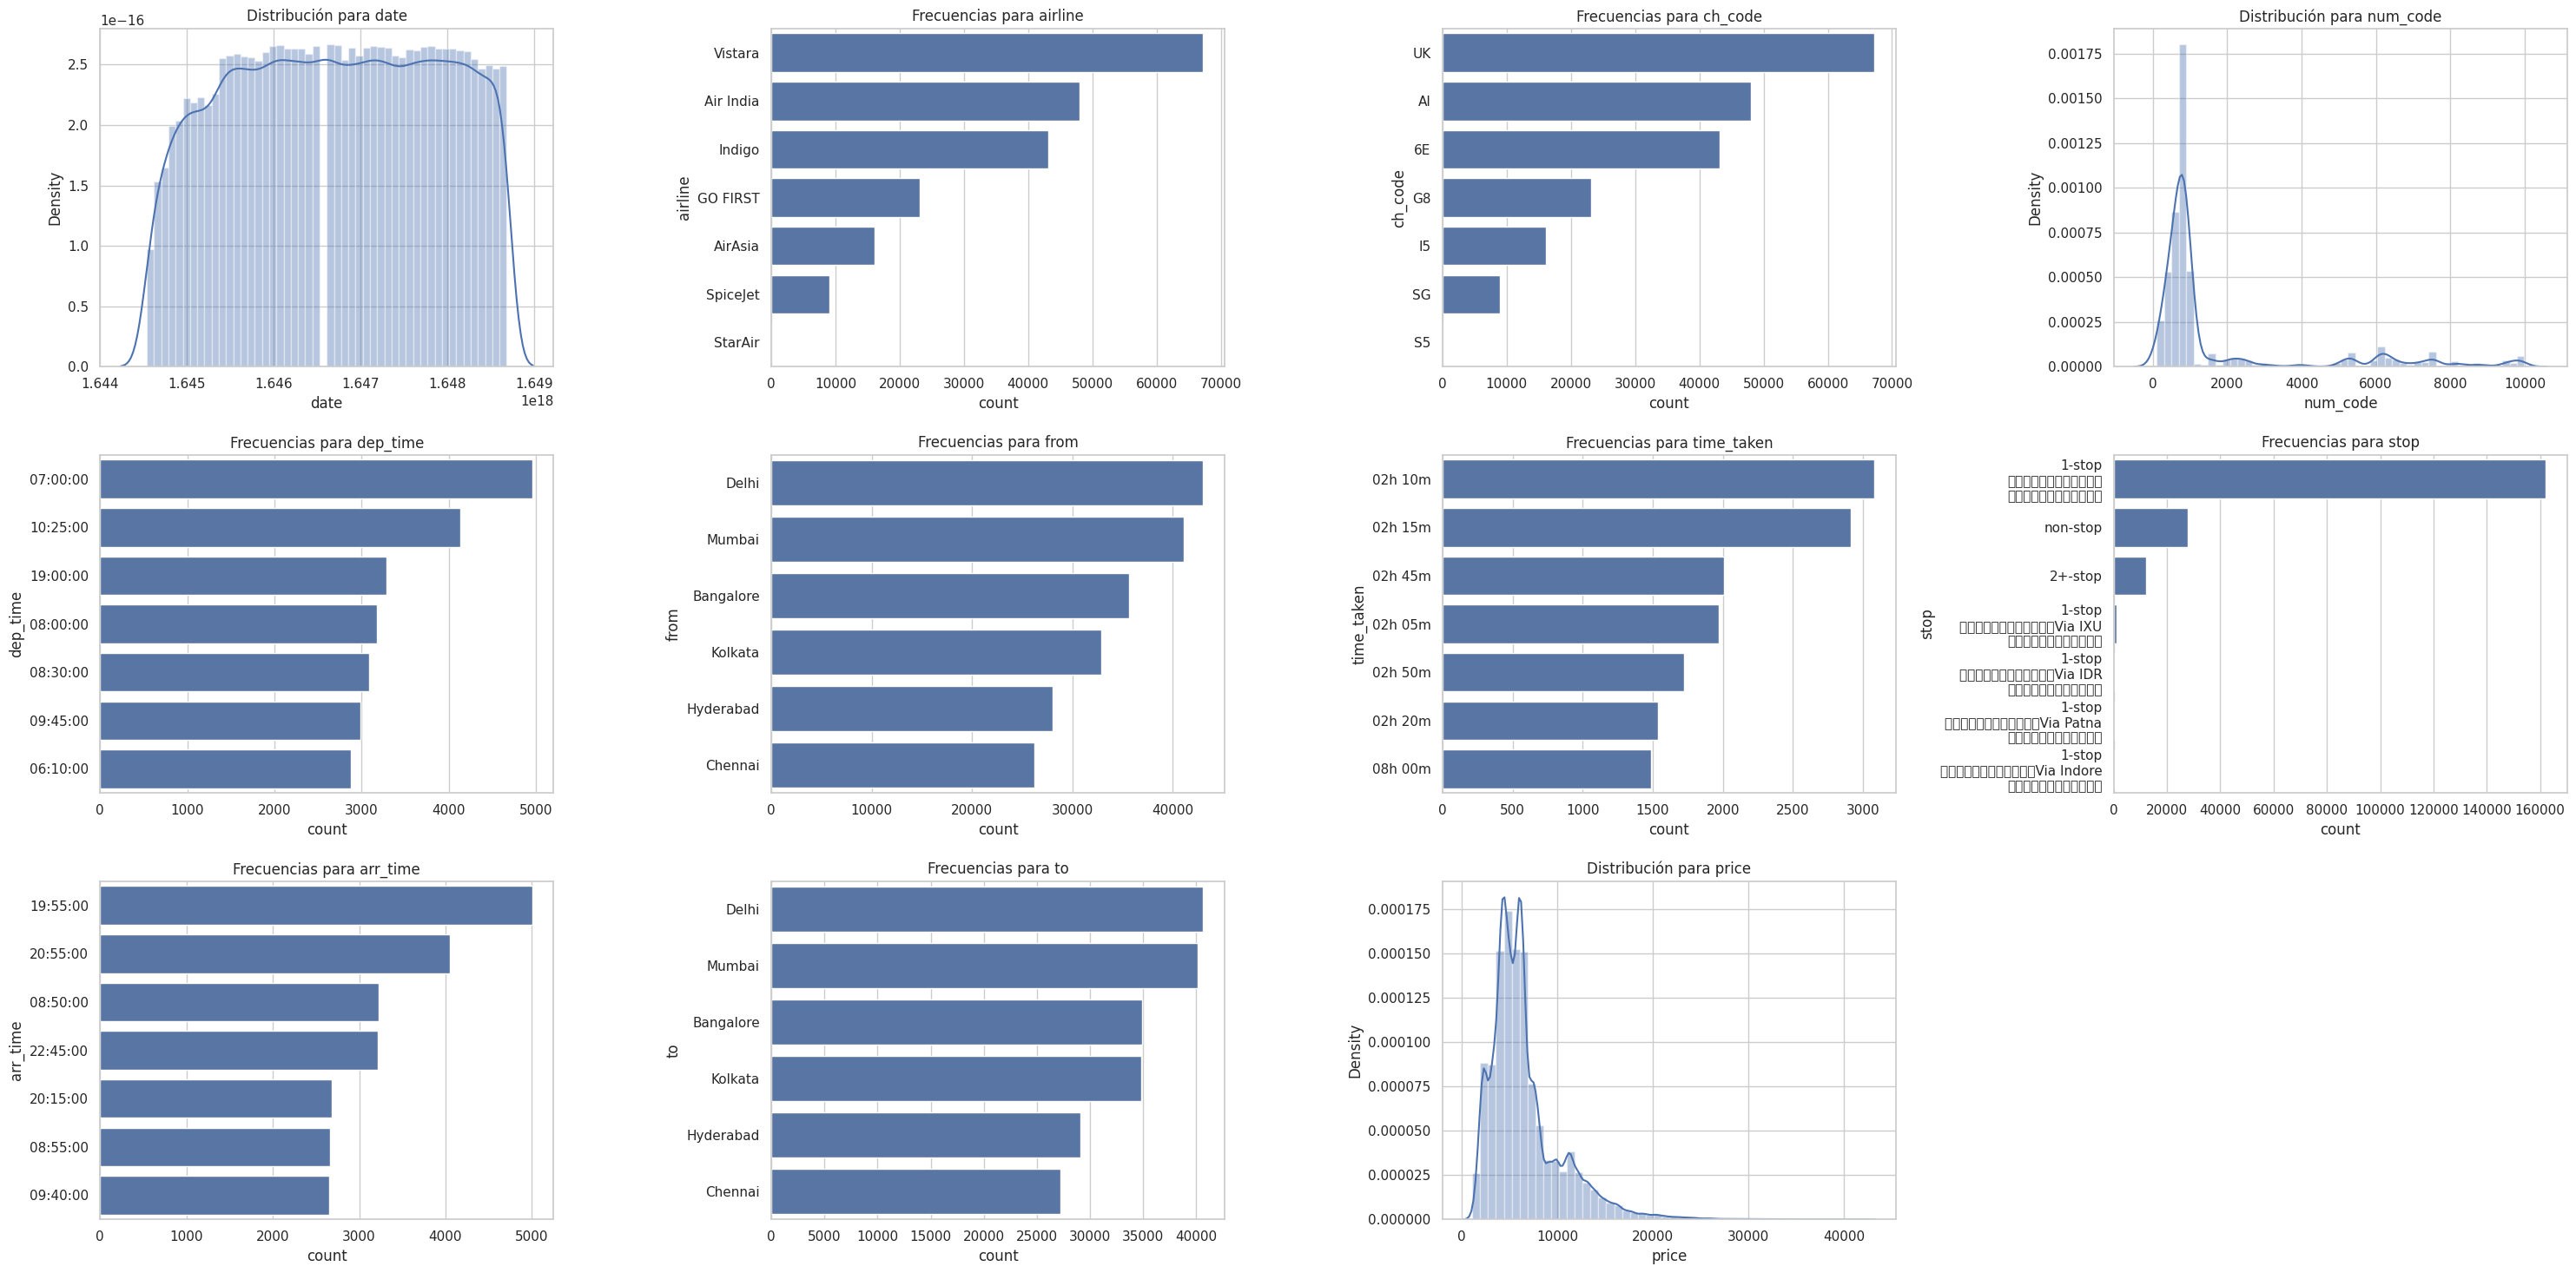

In [175]:
plt.rcParams.update({'font.size': 18})
num_cols = len(economy_data_o.columns)
rows = (num_cols // 4) + (num_cols % 4 > 0)  # Calcula el número de filas necesarias

plt.figure(figsize=(30, 5 * rows))  # Ajusta la altura de la figura dinámicamente
for n, i in enumerate(list(economy_data_o.columns)):
    plt.subplot(rows, 4, n + 1)
    if analysis_result_economy.loc[i, 'Type']=='object':
        sns.countplot(y= economy_data_o[i], order=economy_data_o[i].value_counts().iloc[:7].index)
        plt.title('Frecuencias para {}'.format(i))

    else:
        sns.distplot(economy_data_o[i])
        plt.title('Distribución para {}'.format(i))
    plt.tight_layout()

### **Estratégias a utilizar**

| Problema                        | Columnas Afectadas       | Acción                                         |
|----------------------------------|-------------------------|-----------------------------------------------|
| **Tipos de datos incorrectos**   | `price` (Business)      | Convertir a `int64` o `float64`              |
| **Outliers**                     | `price`, `time_taken`   | Aplicar IQR y capping/remoción               |
| **Datos categóricos inconsistentes** | `airline`, `from`, `to`, `ch_code` | Normalizar y revisar inconsistencias |
| **Formato de tiempo incorrecto** | `dep_time`, `arr_time` | Convertir a `datetime` y extraer características |
| **Posibles valores nulos ocultos** | Columnas `object`      | Revisar y convertir valores vacíos en `NaN`  |



### Transformar Columnas

In [176]:
business_data = business_data_o.copy()
economy_data = economy_data_o.copy()

Corregir Columna `price`

In [177]:
def identificar_no_numericos(df, columnas,columnas_print):
    """
    Identifica las filas con valores no numéricos en las columnas especificadas sin eliminar datos.

    Parámetros:
    df (pd.DataFrame): DataFrame a analizar.
    columnas (list): Lista de nombres de columnas a evaluar.

    Retorna:
    dict: Diccionario donde las claves son los nombres de las columnas y los valores son DataFrames con los valores no numéricos encontrados.
    """
    valores_no_numericos = {}

    for col in columnas:
        # Identificar valores no convertibles a numérico, sin afectar nulos
        no_numericos = df[~df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna() & df[col].notna()]

        if not no_numericos.empty:
            # Almacenar el DataFrame en el diccionario
            valores_no_numericos[col] = no_numericos

            # Imprimir el DataFrame de valores no numéricos para esta columna
            print(f"\nValores NO numéricos '{col}':",len(no_numericos), f"({(len(no_numericos) / len(df))*100:.2f}% total registros)")
            print(no_numericos[columnas_print])

    return valores_no_numericos

In [178]:
business_data.value_counts('price')

,count
price,
54608,1445
54684,1390
60978,1383
60508,1230
51707,1205
...,...
"1,05,168",1
"1,04,987",1
"1,04,624",1


In [179]:
valores_no_numericos = identificar_no_numericos(business_data, ['price'],['from','to','ch_code','price'])


Valores NO numéricos 'price': 108 (0.12% total registros)
          from         to ch_code     price
9192     Delhi    Kolkata      UK  1,14,434
9193     Delhi    Kolkata      UK  1,16,562
9359     Delhi    Kolkata      UK  1,00,395
9429     Delhi    Kolkata      UK  1,01,369
9430     Delhi    Kolkata      UK  1,17,307
...        ...        ...     ...       ...
86808  Chennai  Bangalore      UK  1,07,597
89335  Chennai    Kolkata      UK  1,02,832
89415  Chennai    Kolkata      UK  1,02,384
89504  Chennai    Kolkata      UK  1,04,624
89738  Chennai    Kolkata      UK  1,02,384

[108 rows x 4 columns]


### 🇮🇳 **Contexto del Sistema Numérico en India**

Al analizar los valores no numéricos en columnas que deberían ser numéricas, se observó un patrón en los datos, como en el caso de:

```price = 1,07,597```
<br>

Este formato numérico corresponde al sistema de numeración indio, el cual difiere del sistema occidental en la forma en que agrupa los miles y millones.

<br>

| Número (Occidental) | Número (Indio)  | Lectura en India |
|--------------------|---------------|----------------|
| 100,000          | 1,00,000       | 1 Lakh        |
| 1,000,000        | 10,00,000      | 10 Lakh       |
| 10,000,000       | 1,00,00,000    | 1 Crore       |

### 🌍 **Impacto Cultural y Lingüístico**

En idiomas como hindi, tamil y bengalí, esta forma de representar los números es natural para los hablantes nativos, facilitando la comprensión y el uso cotidiano en transacciones financieras y documentos oficiales.

In [180]:
business_data['price'] = business_data['price'].astype(str).str.replace(',', '', regex=True)
business_data['price'] = business_data['price'].fillna(0).astype(int)
print("Business Data['price'].dtype: ",business_data['price'].dtype)


Business Data['price'].dtype:  int64


Ahora que tenemos las mismas type por columna procedemos a unir ambos dataframes.

In [181]:
data_unified_o = pd.concat([business_data, economy_data], ignore_index=True)
print('Nuevo Dataset Unificado:', data_unified_o.shape)

Nuevo Dataset Unificado: (300261, 11)


---

# **🚩Base 2** (merge data)

---


In [182]:
data_unified = data_unified_o.copy()

Corroboramos el estado de nuestro nuevo dataset

In [183]:
analysis_result_unified = data_quality_analysis(data_unified)
print(50*'-','\nUnified Data')
print(analysis_result_unified.sort_values('Type'))

-------------------------------------------------- 
Unified Data
                      Type  Unique  Missing  Not Missing
Column                                                  
date        datetime64[ns]      49        0       300261
num_code             int64    1255        0       300261
price                int64   12165        0       300261
airline             object       8        0       300261
ch_code             object       8        0       300261
dep_time            object     251        0       300261
from                object       6        0       300261
time_taken          object     483        0       300261
stop                object      40        0       300261
arr_time            object     266        0       300261
to                  object       6        0       300261


Ahora arreglemos las demás columnas ```time_taken```

In [184]:
print(data_unified['time_taken'].head(3))
data_unified['time_taken'] = data_unified['time_taken'].astype(str).str.replace('m', '', regex=True)
print(data_unified['time_taken'].head(3))

0    02h 00m
1    02h 15m
2    24h 45m
Name: time_taken, dtype: object
0    02h 00
1    02h 15
2    24h 45
Name: time_taken, dtype: object


In [185]:
# Extraer minutos y horas de 'time_taken'
data_unified['minutos'] = data_unified['time_taken'].str.split('h').str[-1]
data_unified['horas'] = data_unified['time_taken'].str.split('h').str[0]
data_unified['minutos'] = data_unified['minutos'].str.strip().replace('', '0')
data_unified['minutos'] = data_unified['minutos'].fillna(0).astype(float).round(0).astype('int64')
data_unified['horas'] = data_unified['horas'].fillna(0).astype(float).round(0).astype('int64')
data_unified['time_taken'] = data_unified['horas'] * 60 + data_unified['minutos']

data_unified[['time_taken','horas','minutos']].head()

,time_taken,horas,minutos
0,120,2,0
1,135,2,15
2,1485,24,45
3,1590,26,30
4,400,6,40


In [186]:
data_unified.drop(['horas','minutos'], axis=1, inplace=True)

```'dep_time``` &  ```arr_time'``` to ```datetime64[ns]```

In [187]:
print("Antes")
print("Departure Time:",data_unified['dep_time'].dtype)
print("Arrive Time:",data_unified['arr_time'].dtype)

data_unified['dep_time'] = pd.to_datetime(data_unified['dep_time'], format='%H:%M:%S')
data_unified['arr_time'] = pd.to_datetime(data_unified['arr_time'], format='%H:%M:%S')
print(50*"-","\nDespués")
print("Departure Time:",data_unified['dep_time'].dtype)
print("Arrive Time:",data_unified['arr_time'].dtype)

print(50*"-","\nNuevo Análisis")
print(data_quality_analysis(data_unified).sort_values('Type'))

Antes
Departure Time: object
Arrive Time: object
-------------------------------------------------- 
Después
Departure Time: datetime64[ns]
Arrive Time: datetime64[ns]
-------------------------------------------------- 
Nuevo Análisis
                      Type  Unique  Missing  Not Missing
Column                                                  
date        datetime64[ns]      49        0       300261
num_code             int64    1255        0       300261
dep_time    datetime64[ns]     251        0       300261
time_taken           int64     476        0       300261
arr_time    datetime64[ns]     266        0       300261
price                int64   12165        0       300261
airline             object       8        0       300261
ch_code             object       8        0       300261
from                object       6        0       300261
stop                object      40        0       300261
to                  object       6        0       300261


```'stop'``` colum to stop ```integer```

In [188]:
!pip install airportsdata

In [189]:
data_unified['stop'].value_counts()

,count
stop,
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,243603
non-stop,36044
2+-stop,13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t,1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t,1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t,674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t,381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t,354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t,321


Vamos a extraer el numero de paradas y el sitio si aparece

In [190]:
data_unified['stop_clean'] = data_unified['stop'].str.extract(r'^(non-stop|1-stop|2\+-stop)')
data_unified['stop_city'] = data_unified['stop'].str.extract(r'Via\s+([A-Za-z\s]+)')
data_unified['stop_city'] = data_unified['stop_city'].str.split(r'\s|\n').str[0]

print(data_unified['stop_clean'].value_counts(),"\n")
print("stop_city:",data_unified['stop_city'].unique())

stop_clean
1-stop      250929
non-stop     36044
2+-stop      13288
Name: count, dtype: int64 

stop_city: [nan 'IDR' 'IXU' 'Chennai' 'Lucknow' 'STV' 'Hyderabad' 'GAY' 'Guwahati'
 'GAU' 'VTZ' 'NDC' 'IXE' 'Raipur' 'PAT' 'RPR' 'Patna' 'Kolkata' 'HYD'
 'Delhi' 'Bhubaneswar' 'BBI' 'Surat' 'Indore' 'GOP' 'Nagpur' 'NAG'
 'Vishakhapatnam' 'Mangalore' 'Mumbai' 'KLH' 'MYQ' 'Kolhapur' 'JRG'
 'Ranchi' 'IXR' 'JGB' 'Mysore']


**🛬Notacion IATA 🛬**

Estandarizamos las columnas: ```'stop_city'``` ```'to'``` ```'from'```

In [191]:
from airportsdata import load

airports = load('IATA')
city_to_iata = {}
for code, info in airports.items():
    city = info['city']
    if city:
        city_to_iata[city.lower()] = code

def ciudad_a_iata(ciudad):
    # Check if ciudad is a string before calling lower()
    if isinstance(ciudad, str):
        return city_to_iata.get(ciudad.strip().lower(), ciudad)  # retorna N/A si no encuentra
    else:
        return ciudad
data_unified['stop_city_cod'] = data_unified['stop_city'].apply(ciudad_a_iata)

nombres_a_siglas = {
    "Delhi": "DEL",
    "Nagpur": "NAG",
    "Surat": "URT",
    "Vishakhapatnam": "VTZ",
    "Kolhapur": "KLH"
}

In [192]:
data_unified['stop_city'] = data_unified['stop_city_cod'].apply(
    lambda x: nombres_a_siglas[x] if len(str(x)) != 3 and x in nombres_a_siglas else x)
data_unified['stop_city'] = data_unified['stop_city'].fillna('NoStop')

data_unified['from_cod'] = data_unified['from'].apply(ciudad_a_iata)
data_unified['from'] = data_unified['from_cod'].apply(
    lambda x: nombres_a_siglas[x] if len(str(x)) != 3 and x in nombres_a_siglas else x)
data_unified['to_cod'] = data_unified['to'].apply(ciudad_a_iata)
data_unified['to'] = data_unified['to_cod'].apply(
    lambda x: nombres_a_siglas[x] if len(str(x)) != 3 and x in nombres_a_siglas else x)

print( "stop_city:",data_unified['stop_city'].unique(),"\n")
print( "from:",data_unified['from'].unique(),"\n")
print( "to:",data_unified['to'].unique())

stop_city: ['NoStop' 'IDR' 'IXU' 'MAA' 'LKO' 'STV' 'BPM' 'GAY' 'GAU' 'VTZ' 'NDC'
 'IXE' 'RPR' 'PAT' 'CCU' 'HYD' 'DEL' 'BBI' 'URT' 'GOP' 'NAG' 'BOM' 'KLH'
 'MYQ' 'JRG' 'IXR' 'JGB'] 

from: ['DEL' 'BOM' 'BLR' 'CCU' 'BPM' 'MAA'] 

to: ['BOM' 'BLR' 'CCU' 'BPM' 'MAA' 'DEL']


Eliminamos todo lo que no nos sirva
airline y ch_code es lo mismo, y el numero de vuelo no tiene mucha utilidad

In [193]:
data_unified.drop(['stop_city_cod','from_cod','to_cod','stop','ch_code','num_code'], axis=1, inplace=True)

Codificación de columnas ```'stops'``` ```'stop_city'``` ```'to'``` ```'from'``` ```'Airline'```

In [194]:
mapeo_stops = {
    'non-stop': 0,
    '1-stop': 1,
    '2+-stop': 2
}
data_unified['stop'] = data_unified['stop_clean'].map(mapeo_stops)
print(data_unified['stop'].dtype)
data_unified.drop(['stop_clean'], axis=1, inplace=True)

int64


In [195]:
print(50*"-","\nNuevo Análisis")
print(data_quality_analysis(data_unified).sort_values('Type'))
print(50*"-")

-------------------------------------------------- 
Nuevo Análisis
                      Type  Unique  Missing  Not Missing
Column                                                  
date        datetime64[ns]      49        0       300261
dep_time    datetime64[ns]     251        0       300261
time_taken           int64     476        0       300261
arr_time    datetime64[ns]     266        0       300261
price                int64   12165        0       300261
stop                 int64       3        0       300261
airline             object       8        0       300261
from                object       6        0       300261
to                  object       6        0       300261
stop_city           object      27        0       300261
--------------------------------------------------


# Outliers

✅No Outliers:  date


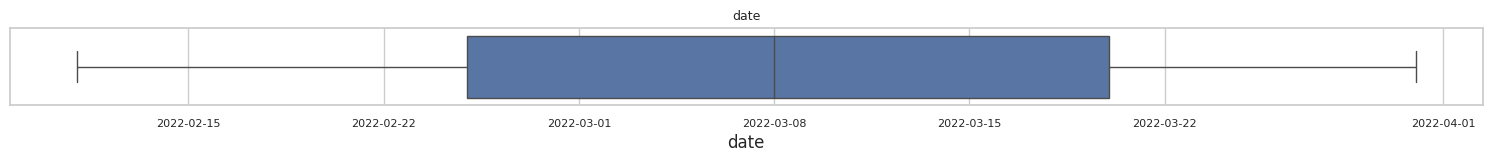

----------------------------------------------------------------------------------------------------
✅No Outliers:  dep_time


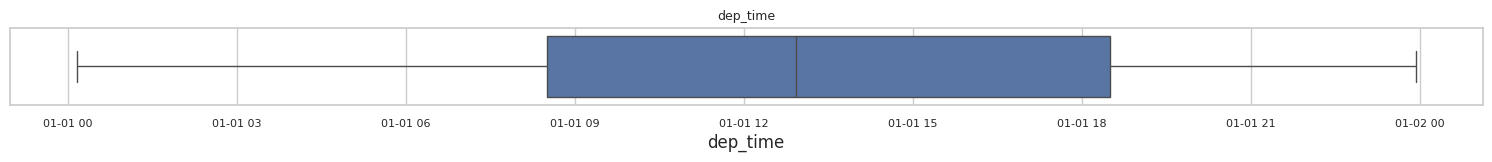

----------------------------------------------------------------------------------------------------
⭕Outliers time_taken: 2004 (0.67%)


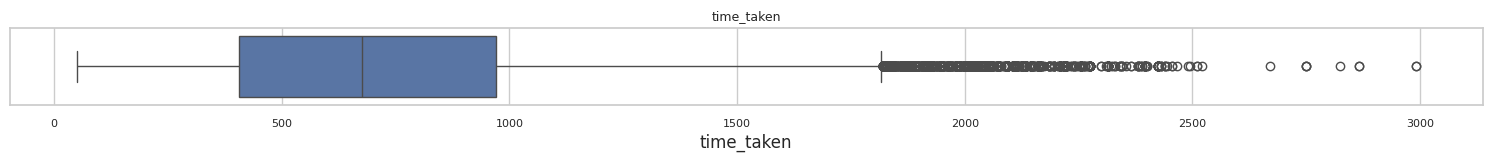

,date,airline,dep_time,from,time_taken,arr_time,to,price,stop_city,stop
15011,2022-03-28,Air India,1900-01-01 06:00:00,DEL,1825,1900-01-01 12:25:00,BPM,47408,STV,1
27065,2022-03-26,Vistara,1900-01-01 13:20:00,BOM,1865,1900-01-01 20:25:00,BLR,64005,NoStop,1
27150,2022-03-27,Vistara,1900-01-01 13:20:00,BOM,1865,1900-01-01 20:25:00,BLR,64005,NoStop,1
27231,2022-03-28,Vistara,1900-01-01 13:20:00,BOM,1865,1900-01-01 20:25:00,BLR,64005,NoStop,1
27308,2022-03-29,Vistara,1900-01-01 13:20:00,BOM,1865,1900-01-01 20:25:00,BLR,64005,NoStop,1
...,...,...,...,...,...,...,...,...,...,...
299124,2022-03-18,Vistara,1900-01-01 09:45:00,MAA,2110,1900-01-01 20:55:00,BPM,6015,NoStop,2
299125,2022-03-18,Vistara,1900-01-01 07:00:00,MAA,2275,1900-01-01 20:55:00,BPM,6015,NoStop,2
299234,2022-03-19,Air India,1900-01-01 13:20:00,MAA,2055,1900-01-01 23:35:00,BPM,9691,NoStop,2
299297,2022-03-20,Vistara,1900-01-01 12:30:00,MAA,1945,1900-01-01 20:55:00,BPM,6015,NoStop,2


----------------------------------------------------------------------------------------------------
✅No Outliers:  arr_time


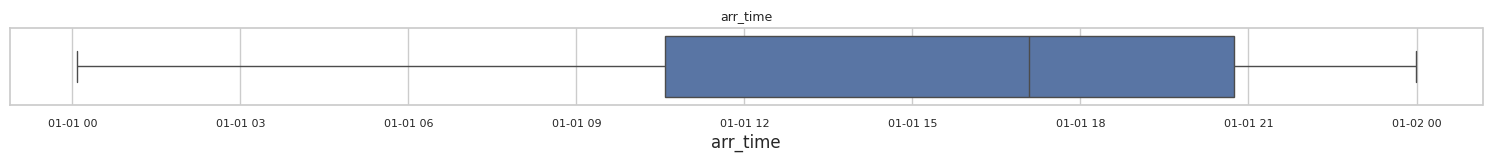

----------------------------------------------------------------------------------------------------
⭕Outliers price: 123 (0.04%)


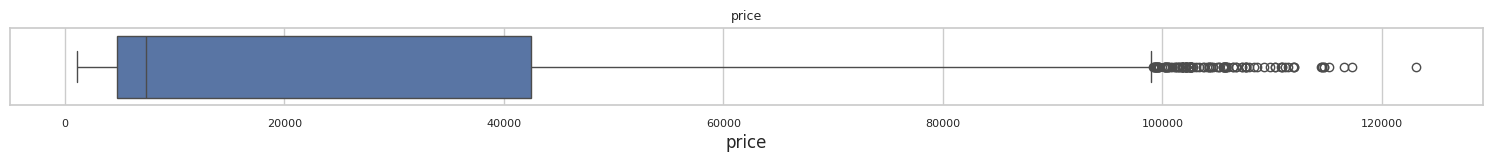

,date,airline,dep_time,from,time_taken,arr_time,to,price,stop_city,stop
9192,2022-02-11,Vistara,1900-01-01 19:50:00,DEL,1265,1900-01-01 16:55:00,CCU,114434,NoStop,2
9193,2022-02-11,Vistara,1900-01-01 19:50:00,DEL,1265,1900-01-01 16:55:00,CCU,116562,NoStop,2
9359,2022-02-14,Vistara,1900-01-01 16:05:00,DEL,1055,1900-01-01 09:40:00,CCU,100395,NoStop,2
9428,2022-02-15,Vistara,1900-01-01 10:20:00,DEL,390,1900-01-01 16:50:00,CCU,99129,NoStop,1
9429,2022-02-15,Vistara,1900-01-01 08:50:00,DEL,480,1900-01-01 16:50:00,CCU,101369,NoStop,1
...,...,...,...,...,...,...,...,...,...,...
86808,2022-02-13,Vistara,1900-01-01 10:45:00,MAA,580,1900-01-01 20:25:00,BLR,107597,NoStop,1
89335,2022-02-13,Vistara,1900-01-01 21:05:00,MAA,690,1900-01-01 08:35:00,CCU,102832,NoStop,1
89415,2022-02-15,Vistara,1900-01-01 06:55:00,MAA,950,1900-01-01 22:45:00,CCU,102384,NoStop,1
89504,2022-02-17,Vistara,1900-01-01 21:05:00,MAA,690,1900-01-01 08:35:00,CCU,104624,NoStop,1


----------------------------------------------------------------------------------------------------


In [196]:
columnas = ['date', 'dep_time', 'time_taken',
       'arr_time', 'price']
for columna in columnas:
    Q1 = data_unified[columna].quantile(0.25)
    Q3 = data_unified[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites superior e inferior
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = data_unified[(data_unified[columna] < lim_inf) | (data_unified[columna] > lim_sup)]

    if len(outliers) > 0:
      print(f"⭕Outliers {columna}: {len(outliers)} ({(len(outliers)/len(data_unified))*100:.2f}%)")
    else:
      print("✅No Outliers: ",columna)

    # Crear una figura más pequeña
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(19, 1))
    sns.boxplot(x=data_unified[columna], ax=ax)

    ax.set_title(columna, fontsize=9)  # Solo este título, aparece una vez
    ax.tick_params(axis='x', labelsize=8)  # Tamaño de etiquetas eje X

    plt.show()
    if len(outliers) > 0:
      display(outliers)
    else:
      pass
    print('-'*100)


# **Punto 3 y 4 | Análisis y Correlaciones⚖️**



---



<Axes: >

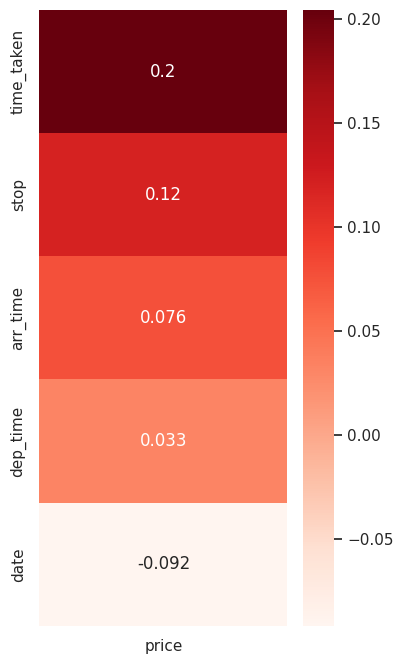

In [197]:
columnas = ['date', 'dep_time', 'time_taken', 'arr_time', 'price',
       'stop']
plt.rcParams.update({'font.size': 12})


plt.figure(figsize=(4, 8))
sns.heatmap(data_unified.loc[:, columnas].corr().loc[:, ['price']].sort_values('price', ascending=False).iloc[1:], cmap='Reds', annot=True)

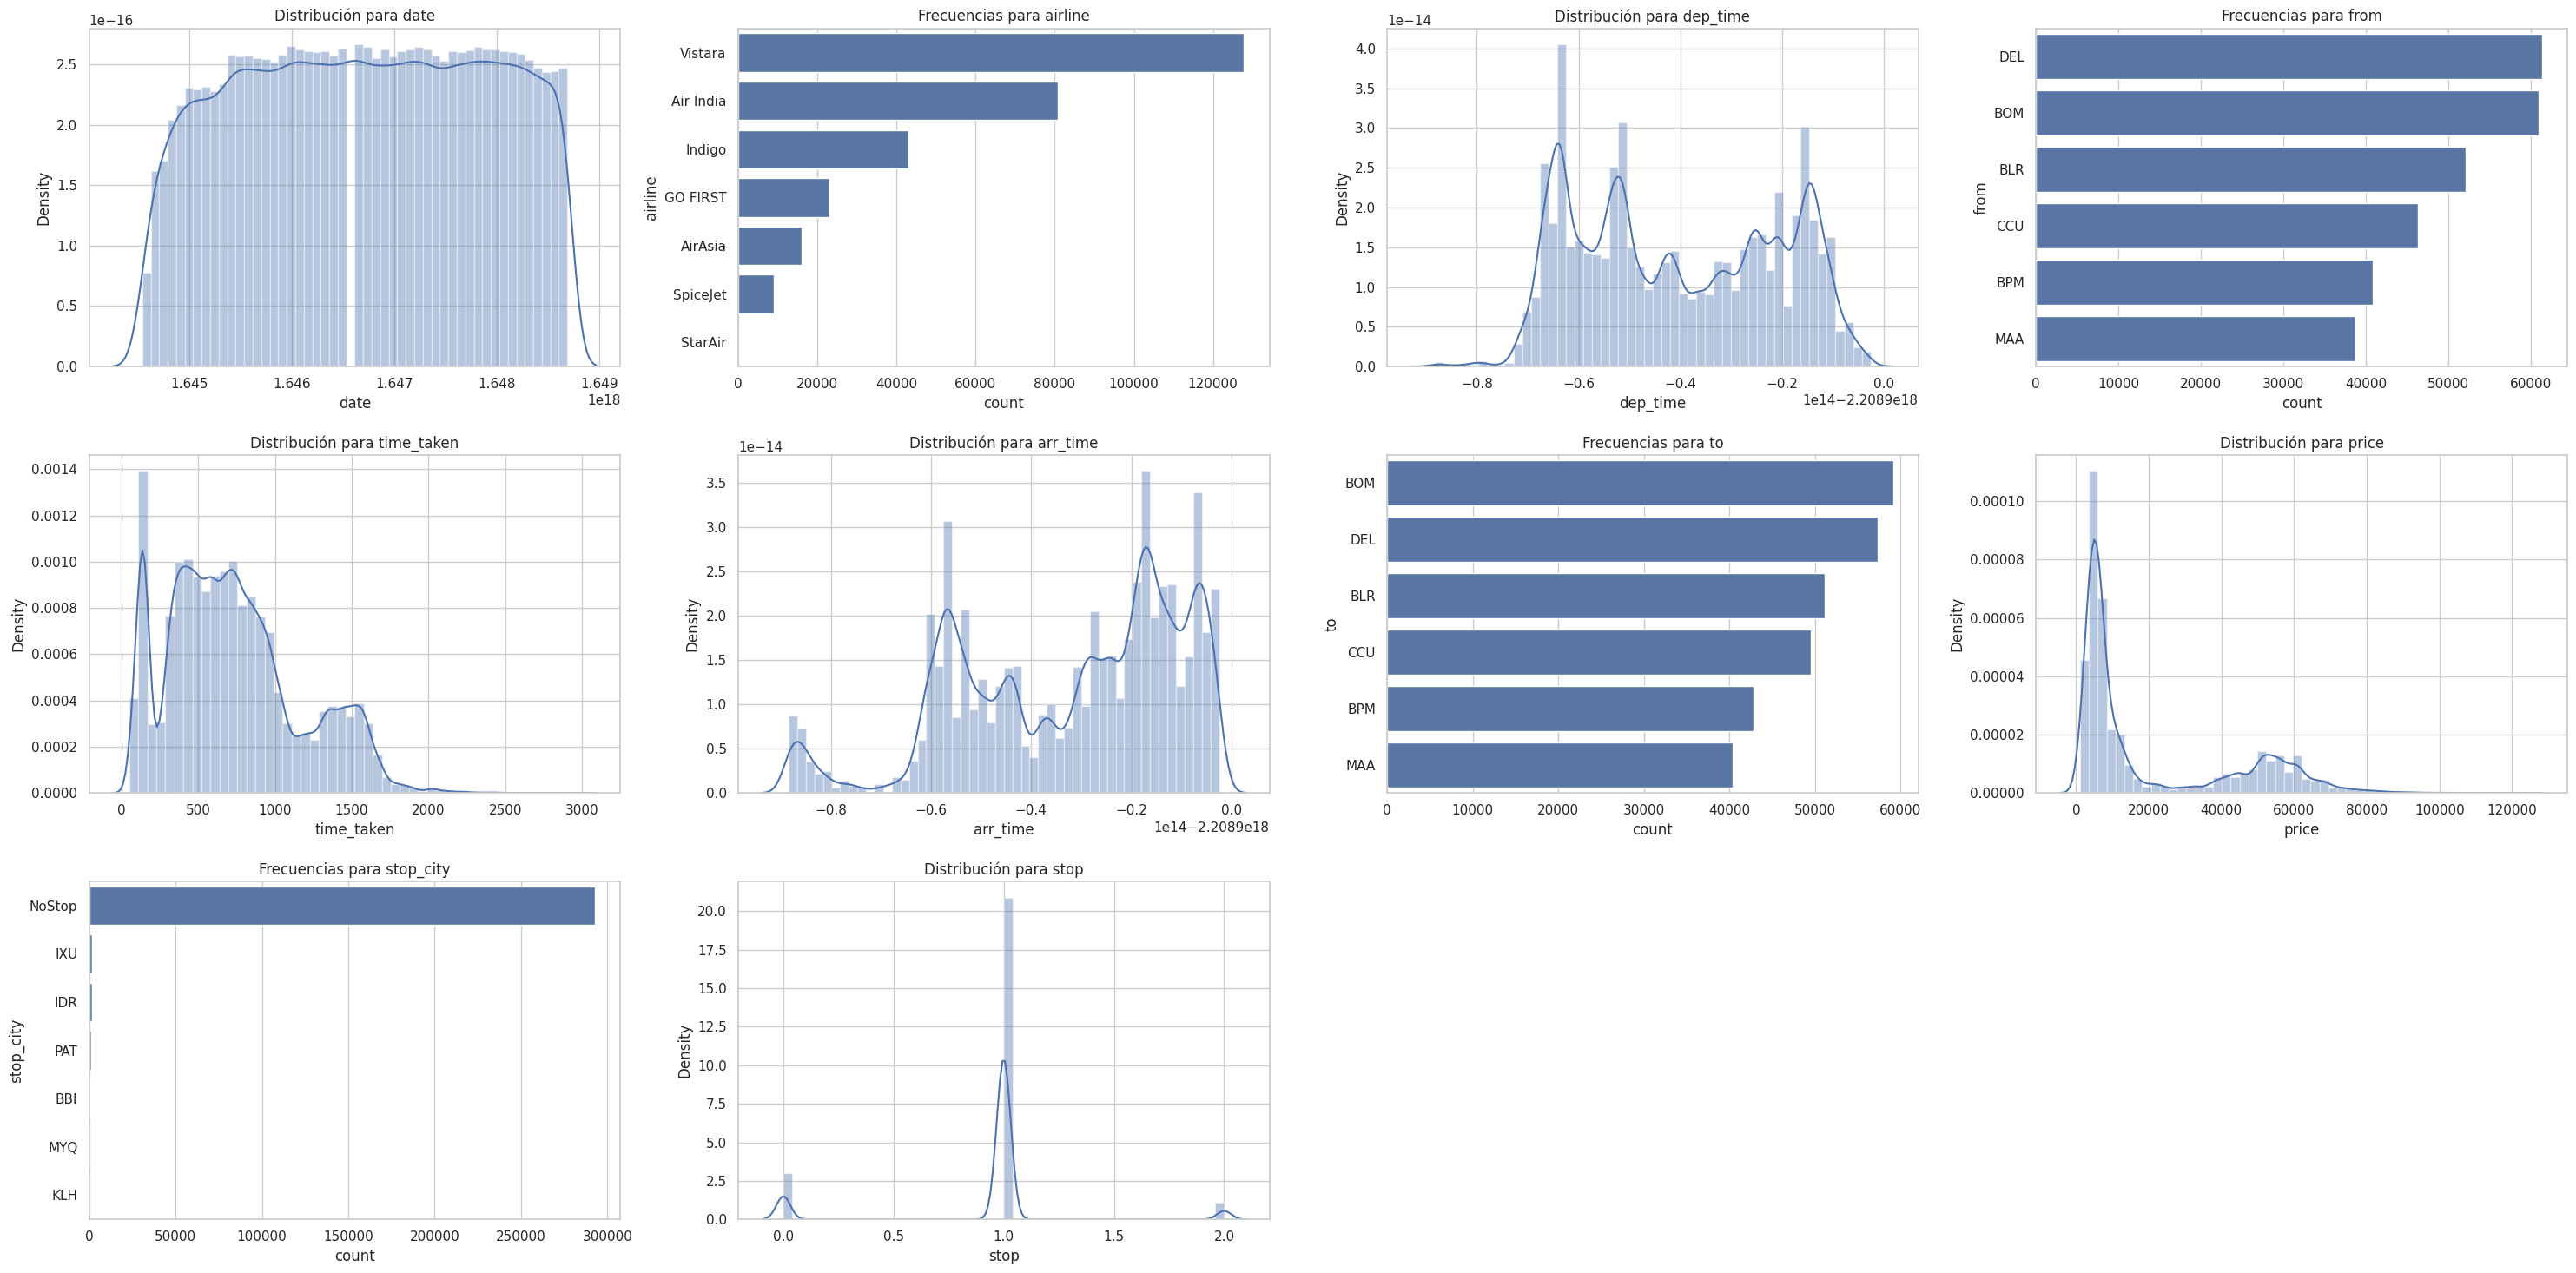

In [198]:
plt.rcParams.update({'font.size': 18})
num_cols = len(economy_data_o.columns)
rows = (num_cols // 4) + (num_cols % 4 > 0)  # Calcula el número de filas necesarias

plt.figure(figsize=(30, 5 * rows))  # Ajusta la altura de la figura dinámicamente
for n, i in enumerate(list(data_unified.columns)):
    plt.subplot(rows, 4, n + 1)
    if data_quality_analysis(data_unified).loc[i, 'Type']=='object':
        sns.countplot(y= data_unified[i], order=data_unified[i].value_counts().iloc[:7].index)
        plt.title('Frecuencias para {}'.format(i))

    else:
        sns.distplot(data_unified[i])
        plt.title('Distribución para {}'.format(i))
    plt.tight_layout()

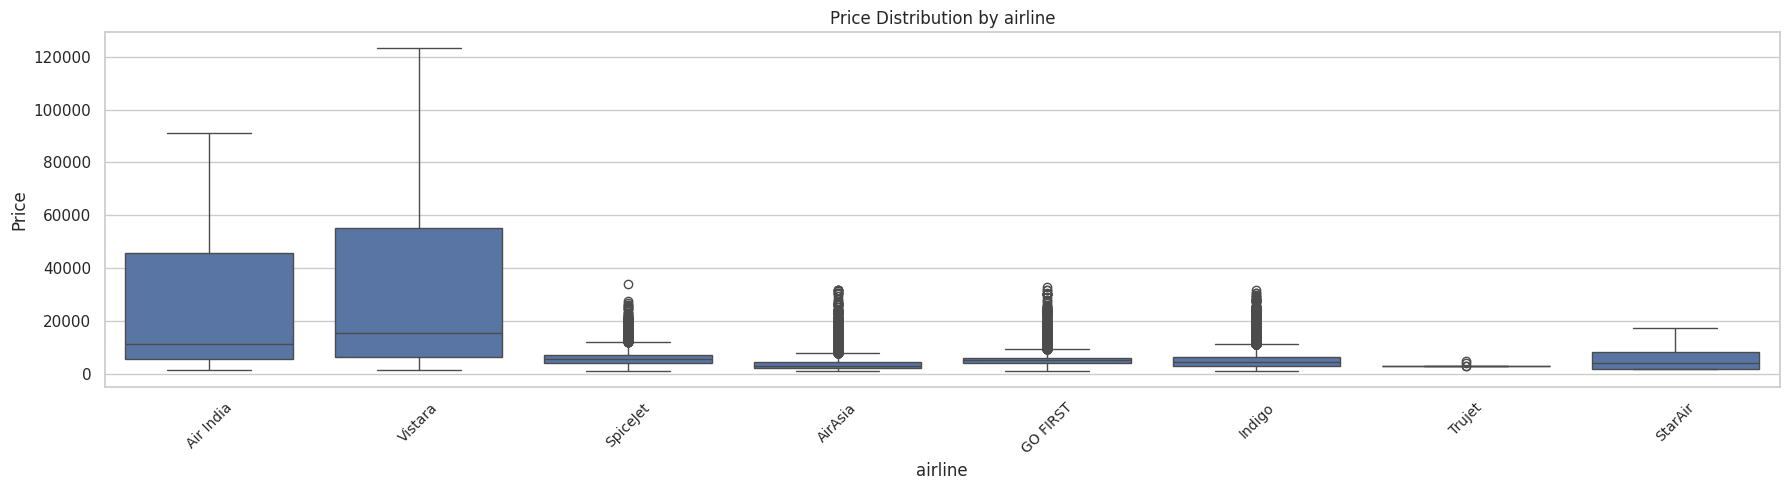

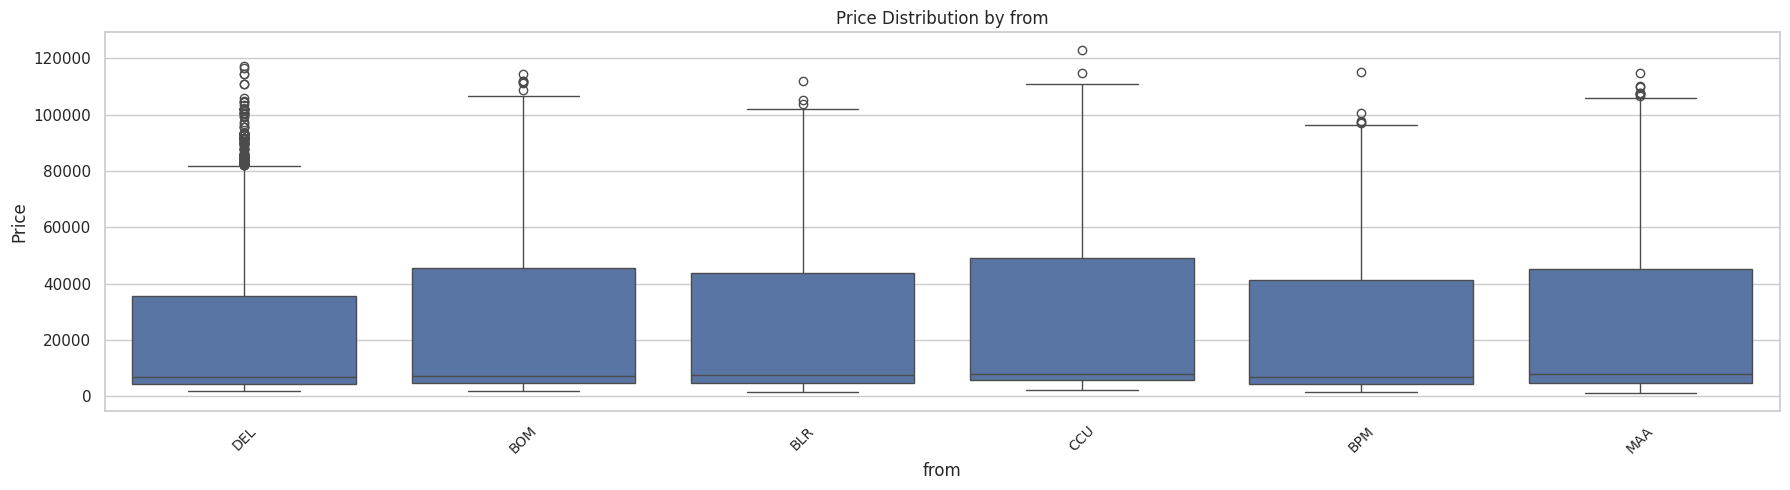

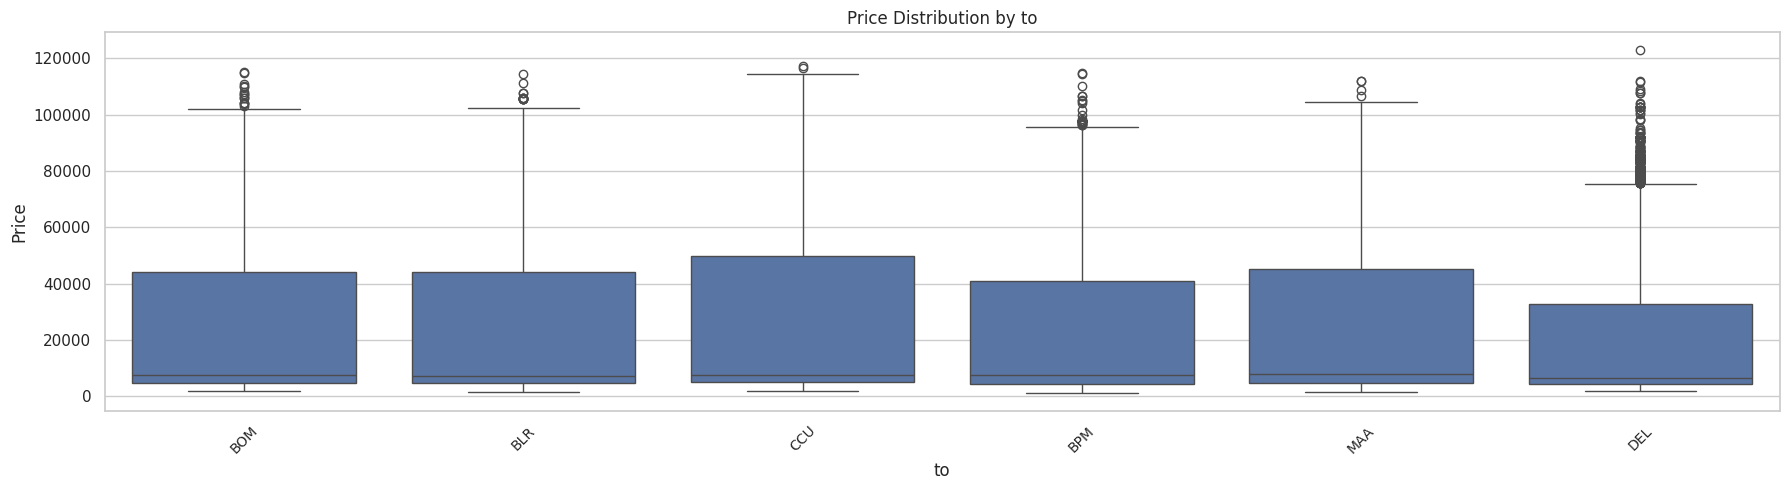

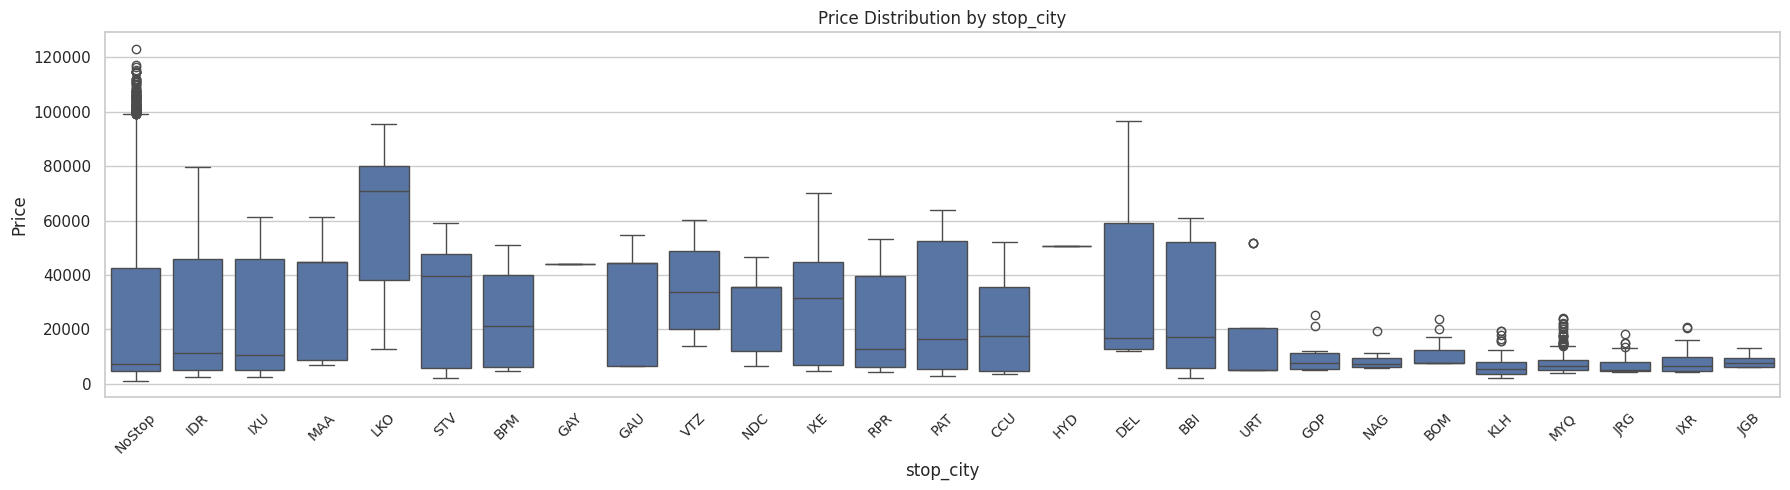

In [199]:
categorical_columns = data_unified.select_dtypes(include='object').columns

# Estilo general de los gráficos
plt.rcParams.update({'font.size': 10})

# Crear un gráfico por cada columna categórica
for col in categorical_columns:
    fig, ax = plt.subplots(figsize=(18, 5))  # Ancho amplio y altura adecuada

    sns.boxplot(x=col, y='price', data=data_unified, ax=ax)

    ax.set_title(f'Price Distribution by {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', labelsize=10)

    plt.xticks(rotation=45)  # Rotar etiquetas si son muchas
    plt.tight_layout()
    plt.show()

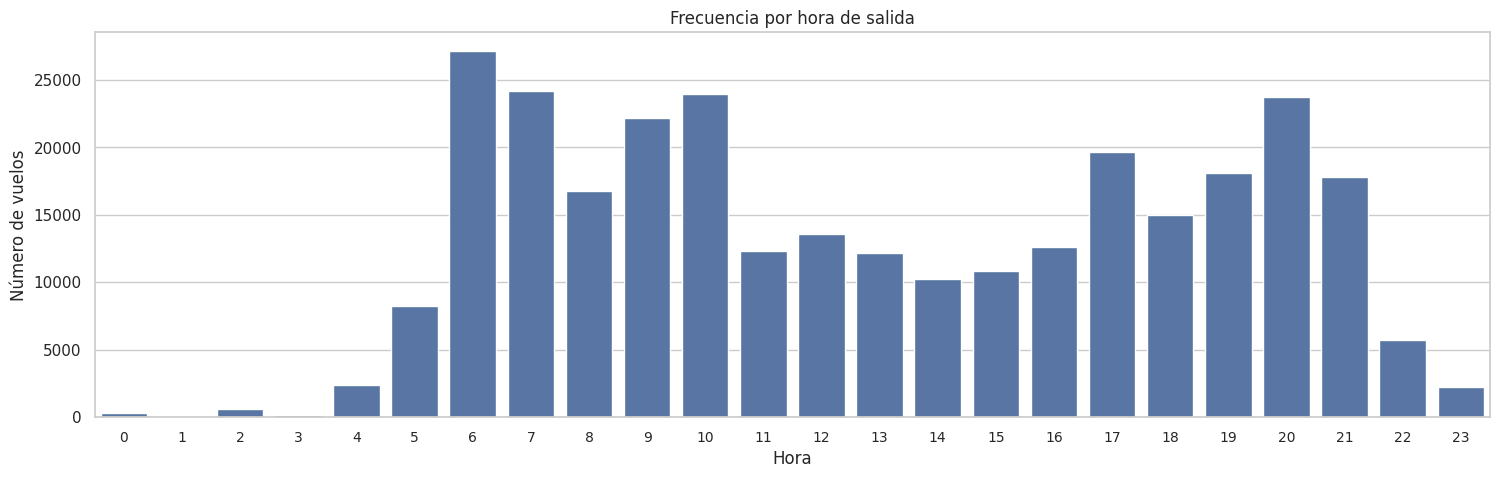

In [200]:
data_unified['dep_hour'] = pd.to_datetime(data_unified['dep_time'], format='%H:%M:%S').dt.hour
plt.rcParams.update({'font.size': 10})
plt.subplots(figsize=(18, 5))
sns.countplot(x='dep_hour', data=data_unified)
plt.title('Frecuencia por hora de salida')
plt.xlabel('Hora')
plt.ylabel('Número de vuelos')
plt.tick_params(axis='x', labelsize=10)
plt.show()

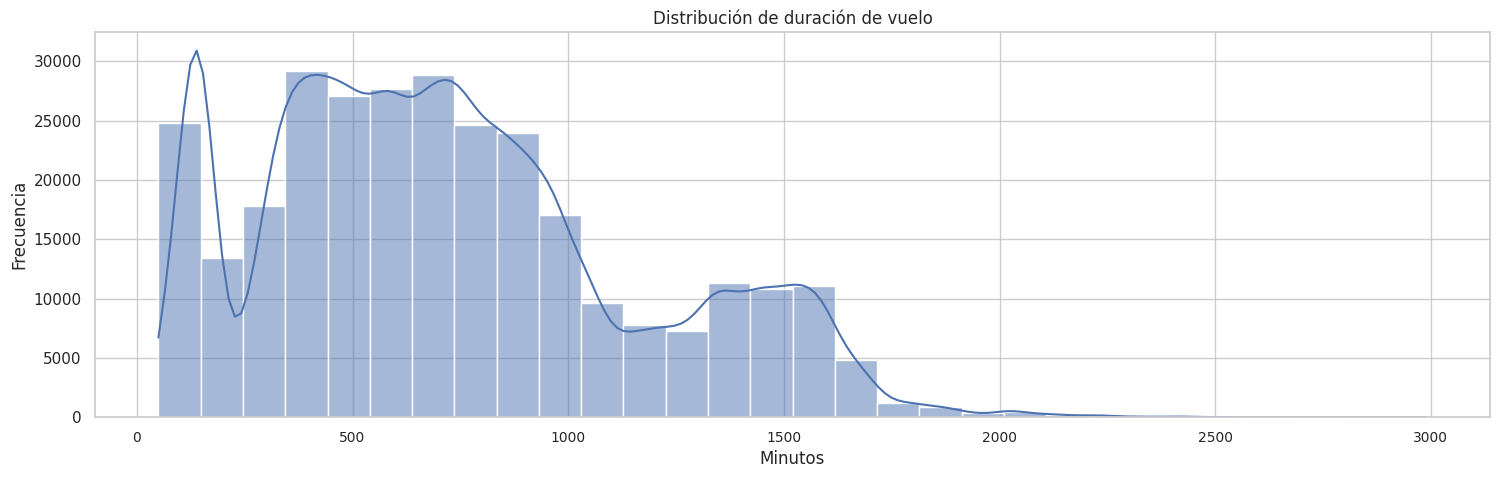

In [201]:
plt.rcParams.update({'font.size': 10})
plt.subplots(figsize=(18, 5))
sns.histplot(data_unified['time_taken'], kde=True, bins=30)
plt.title('Distribución de duración de vuelo')
plt.xlabel('Minutos')
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Frecuencia')
plt.show()

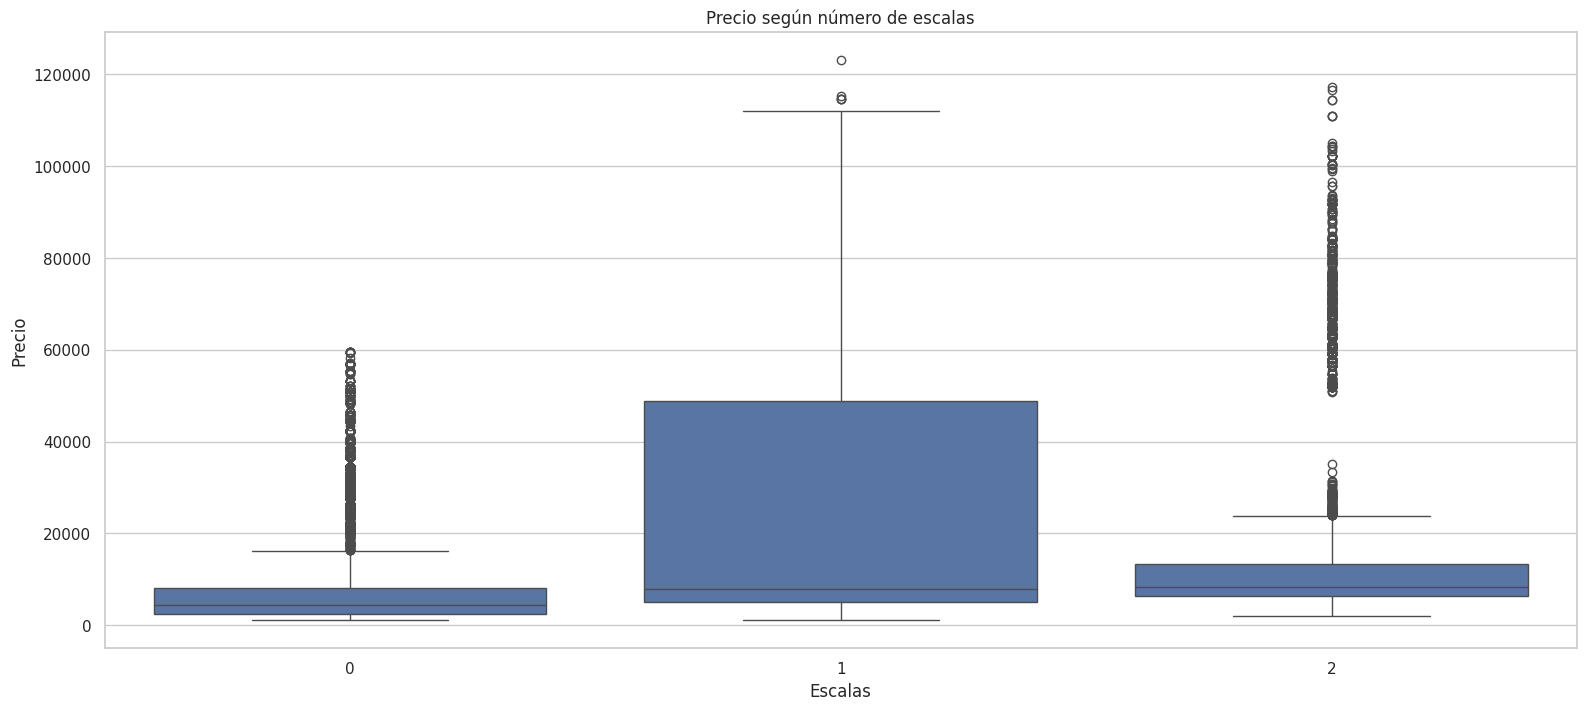

In [202]:
plt.rcParams.update({'font.size': 10})
plt.subplots(figsize=(19, 8))
sns.boxplot(x='stop', y='price', data=data_unified)
plt.title('Precio según número de escalas')
plt.xlabel('Escalas')
plt.ylabel('Precio')
plt.show()


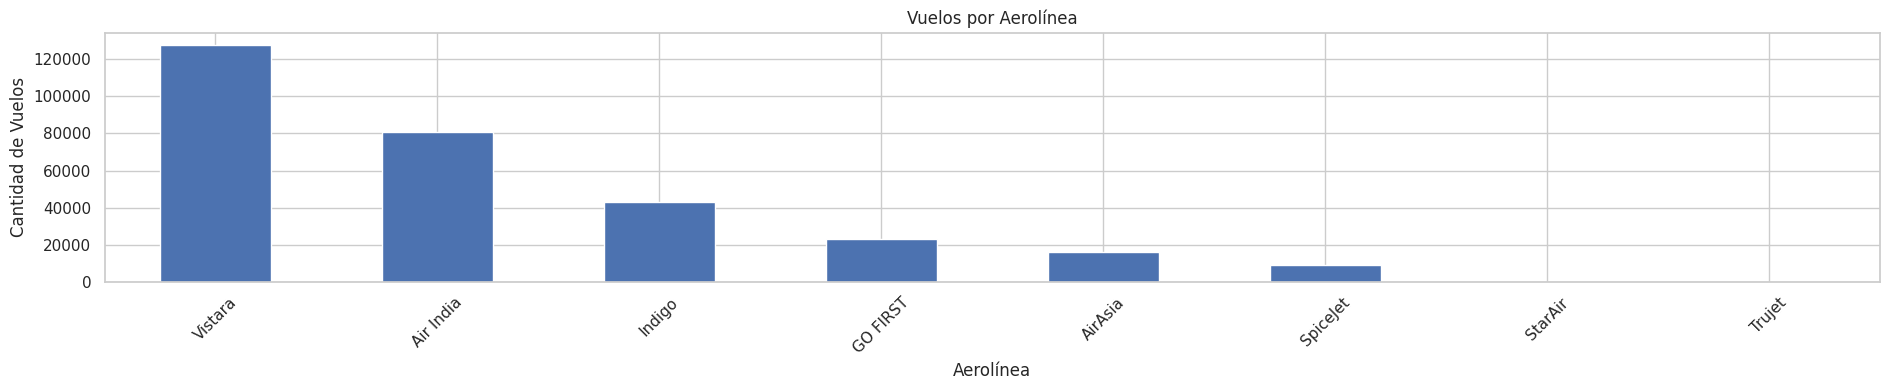

In [203]:
vuelos_por_aerolinea = data_unified['airline'].value_counts()
vuelos_por_aerolinea.plot(kind='bar', figsize=(19,4), title='Vuelos por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Punto 5 | Transformaciones**



---



# Encode

In [204]:
data_unified_encoded = pd.get_dummies(data_unified, columns=['to', 'from', 'airline','stop_city'], prefix=['to', 'fr', 'al','stop'], drop_first=False)

data_unified_encoded.head()


,date,dep_time,time_taken,arr_time,price,stop,dep_hour,to_BLR,to_BOM,to_BPM,...,stop_MAA,stop_MYQ,stop_NAG,stop_NDC,stop_NoStop,stop_PAT,stop_RPR,stop_STV,stop_URT,stop_VTZ
0,2022-02-11,1900-01-01 18:00:00,120,1900-01-01 20:00:00,25612,0,18,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2022-02-11,1900-01-01 19:00:00,135,1900-01-01 21:15:00,25612,0,19,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,2022-02-11,1900-01-01 20:00:00,1485,1900-01-01 20:45:00,42220,1,20,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,2022-02-11,1900-01-01 21:25:00,1590,1900-01-01 23:55:00,44450,1,21,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,2022-02-11,1900-01-01 17:15:00,400,1900-01-01 23:55:00,46690,1,17,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [205]:
data_unified_encoded.columns

Index(['date', 'dep_time', 'time_taken', 'arr_time', 'price', 'stop',
       'dep_hour', 'to_BLR', 'to_BOM', 'to_BPM', 'to_CCU', 'to_DEL', 'to_MAA',
       'fr_BLR', 'fr_BOM', 'fr_BPM', 'fr_CCU', 'fr_DEL', 'fr_MAA',
       'al_Air India', 'al_AirAsia', 'al_GO FIRST', 'al_Indigo', 'al_SpiceJet',
       'al_StarAir', 'al_Trujet', 'al_Vistara', 'stop_BBI', 'stop_BOM',
       'stop_BPM', 'stop_CCU', 'stop_DEL', 'stop_GAU', 'stop_GAY', 'stop_GOP',
       'stop_HYD', 'stop_IDR', 'stop_IXE', 'stop_IXR', 'stop_IXU', 'stop_JGB',
       'stop_JRG', 'stop_KLH', 'stop_LKO', 'stop_MAA', 'stop_MYQ', 'stop_NAG',
       'stop_NDC', 'stop_NoStop', 'stop_PAT', 'stop_RPR', 'stop_STV',
       'stop_URT', 'stop_VTZ'],
      dtype='object')

<Axes: >

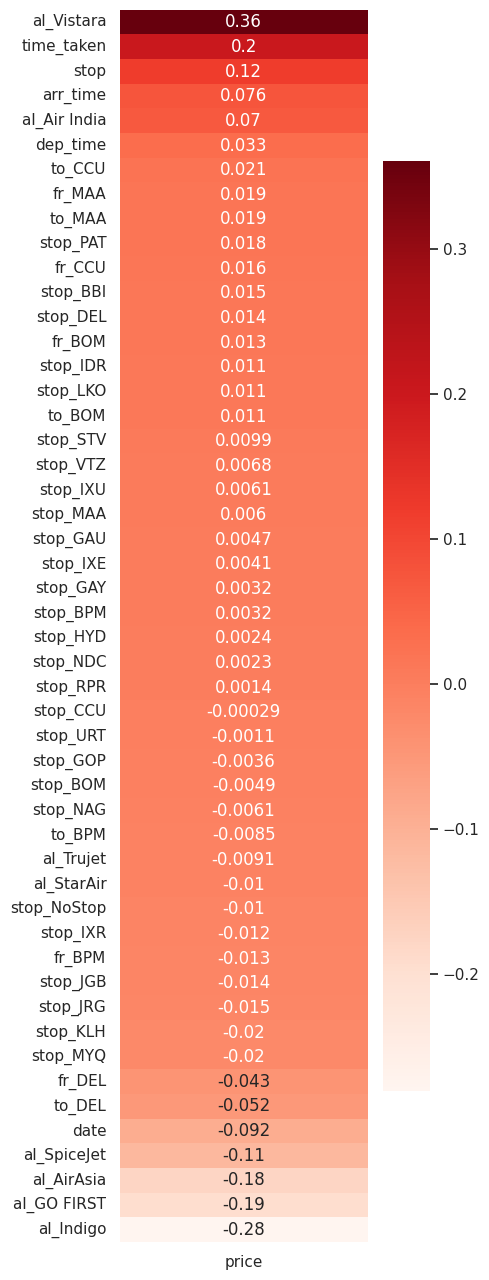

In [220]:
columnas = ['date', 'dep_time', 'time_taken', 'arr_time', 'price',
       'stop', 'to_BOM', 'to_BPM', 'to_CCU', 'to_DEL', 'to_MAA',
       'fr_BOM', 'fr_BPM', 'fr_CCU', 'fr_DEL', 'fr_MAA', 'al_AirAsia',
       'al_GO FIRST', 'al_Indigo', 'al_SpiceJet', 'al_StarAir', 'al_Trujet',
       'al_Vistara','al_Air India', 'stop_BBI', 'stop_BOM',
       'stop_BPM', 'stop_CCU', 'stop_DEL', 'stop_GAU', 'stop_GAY', 'stop_GOP',
       'stop_HYD', 'stop_IDR', 'stop_IXE', 'stop_IXR', 'stop_IXU', 'stop_JGB',
       'stop_JRG', 'stop_KLH', 'stop_LKO', 'stop_MAA', 'stop_MYQ', 'stop_NAG',
       'stop_NDC', 'stop_NoStop', 'stop_PAT', 'stop_RPR', 'stop_STV',
       'stop_URT', 'stop_VTZ']
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(4, 16))
sns.heatmap(data_unified_encoded.loc[:, columnas].corr().loc[:, ['price']].sort_values('price', ascending=False).iloc[1:], cmap='Reds', annot=True)

<Axes: >

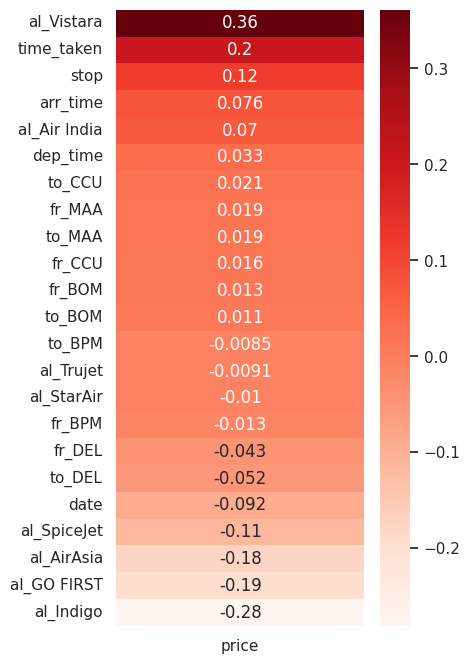

In [206]:
columnas = ['date', 'dep_time', 'time_taken', 'arr_time', 'price',
       'stop', 'to_BOM', 'to_BPM', 'to_CCU', 'to_DEL', 'to_MAA',
       'fr_BOM', 'fr_BPM', 'fr_CCU', 'fr_DEL', 'fr_MAA', 'al_AirAsia',
       'al_GO FIRST', 'al_Indigo', 'al_SpiceJet', 'al_StarAir', 'al_Trujet',
       'al_Vistara','al_Air India']
plt.rcParams.update({'font.size': 12})


plt.figure(figsize=(4, 8))
sns.heatmap(data_unified_encoded.loc[:, columnas].corr().loc[:, ['price']].sort_values('price', ascending=False).iloc[1:], cmap='Reds', annot=True)

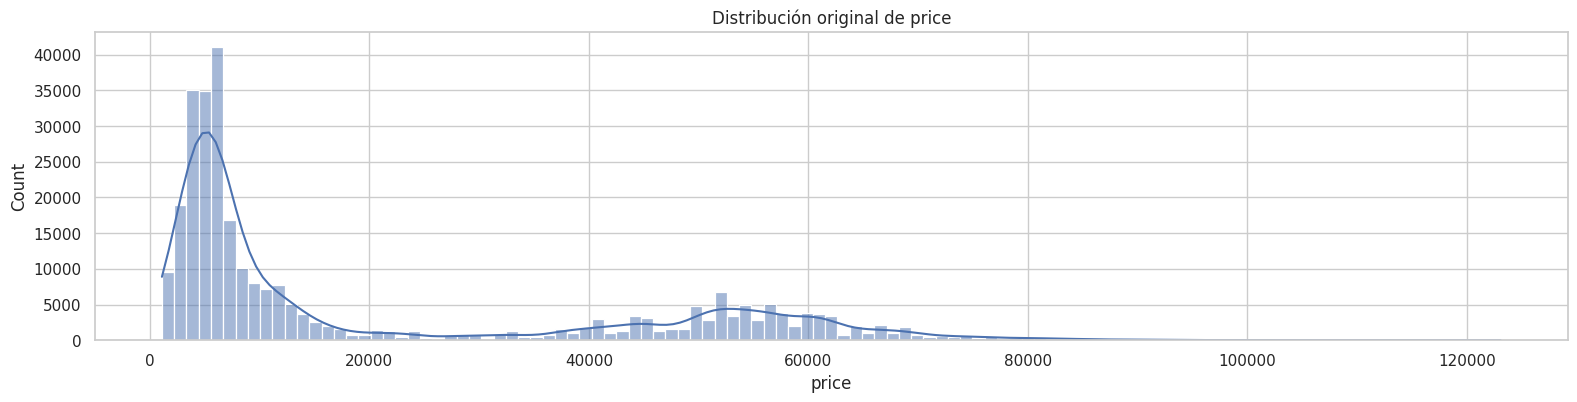

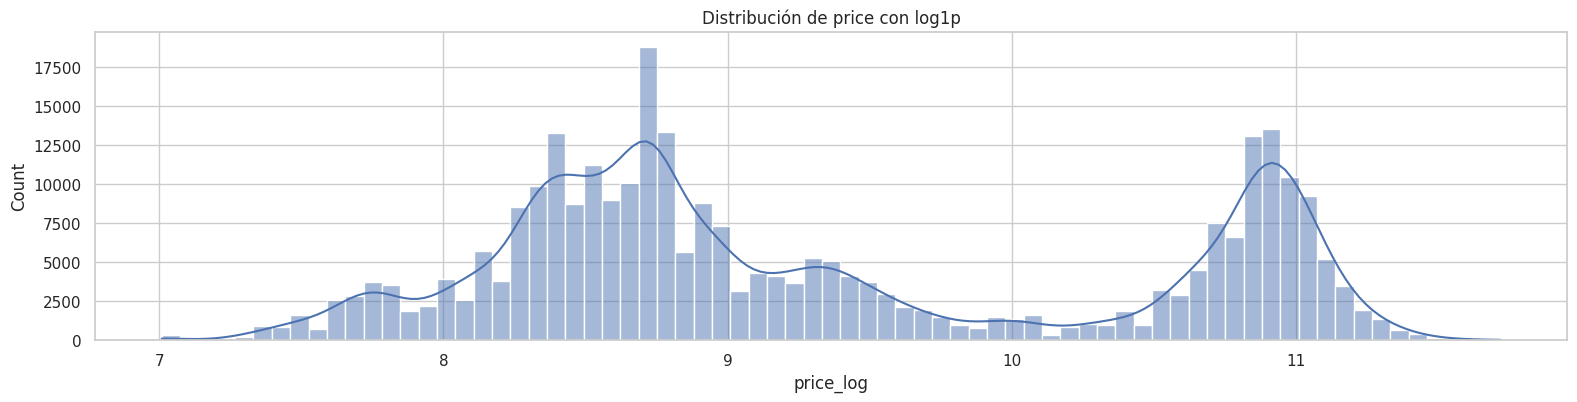

In [207]:
data_unified_encoded['price_log'] = np.log1p(data_unified_encoded['price'])
plt.figure(figsize=(19,4))
sns.histplot(data_unified_encoded['price'], kde=True)
plt.title("Distribución original de price")
plt.show()

plt.figure(figsize=(19,4))
sns.histplot(data_unified_encoded['price_log'], kde=True)
plt.title("Distribución de price con log1p")
plt.show()

Esta gráfica anterior nos muestra que temos una distribucion Long Right Tail o Right Skewed de los precios de los vuelos, y aplicando un logaritmo se puede ver claramente que pasamos a evidenciar dos campanas de gaus. Ya con esta es pertinente establecer qué parámetro enfluye en mayor medida a que haya esta separación.

### **📌¿Qué significa?**

Una distribución multimodal indica que existen subgrupos dentro de tus datos que tienen diferentes comportamientos o características. En tu caso, puede estar sugiriendo que hay dos tipos distintos de vuelos con precios muy diferenciados.

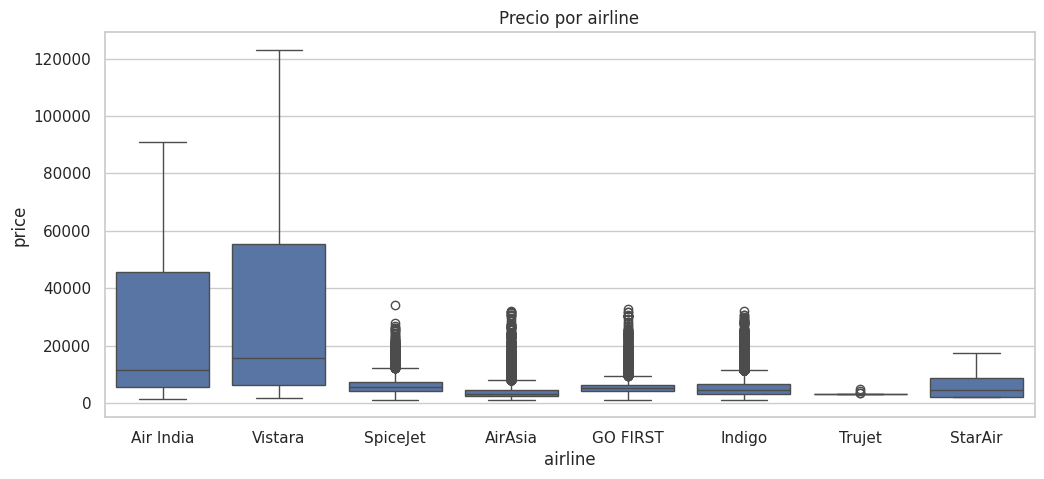

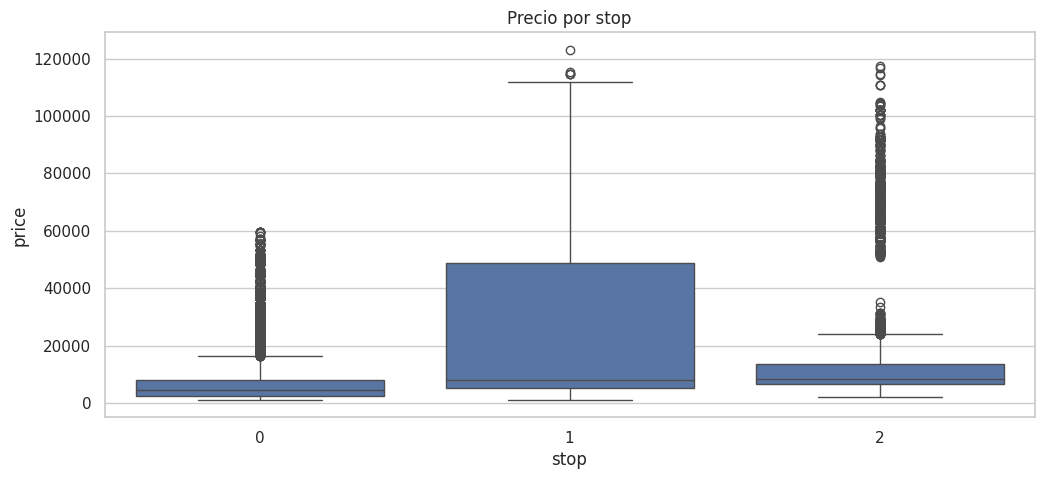

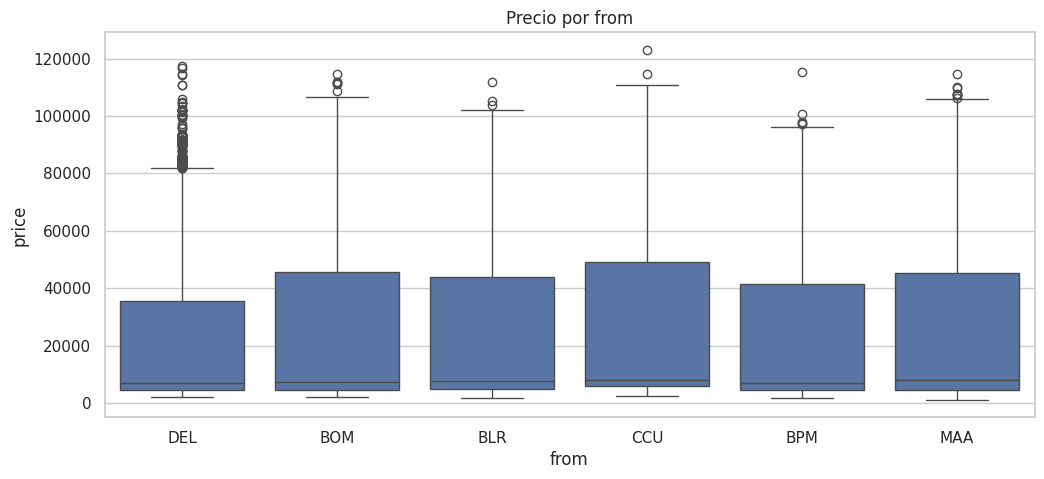

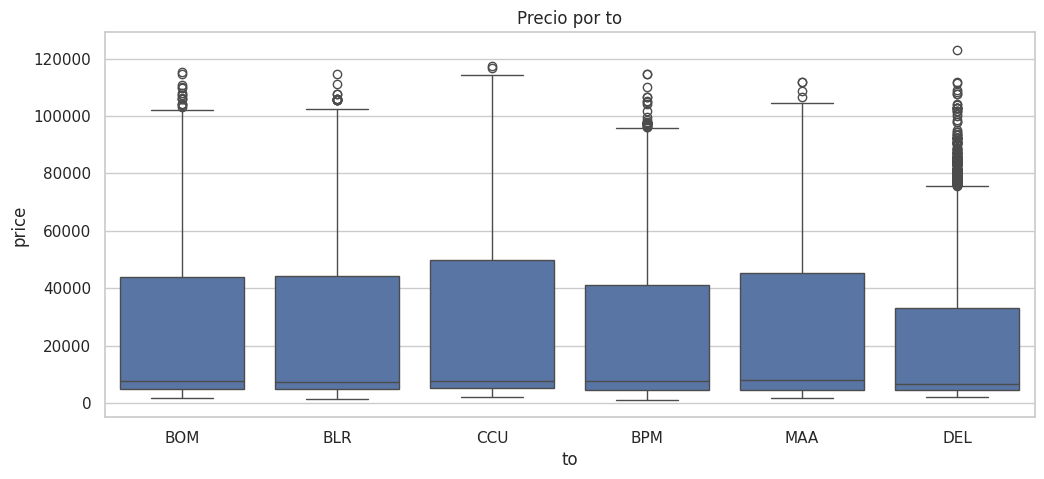

In [208]:
cat_cols = ['airline', 'stop', 'from', 'to']

for col in cat_cols:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=col, y='price', data=data_unified)
    plt.title(f'Precio por {col}')
    plt.show()


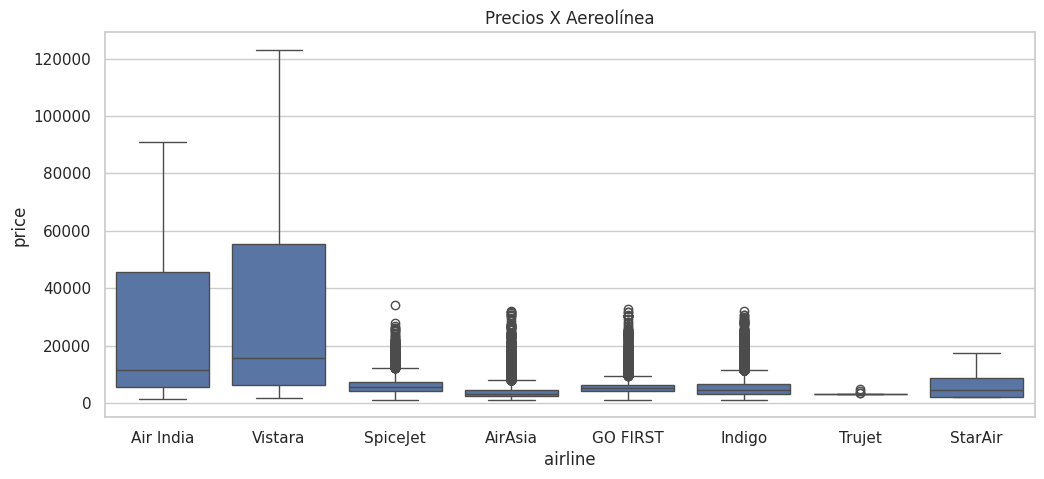

In [209]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=data_unified, x='airline', y='price')
plt.title('Precios X Aereolínea')
plt.show()


In [210]:
data_unified_2 = data_unified.copy()
data_unified_2 = data_unified_2[data_unified_2['price']<28000]
data_unified_2['price_log'] = np.log1p(data_unified_2['price'])

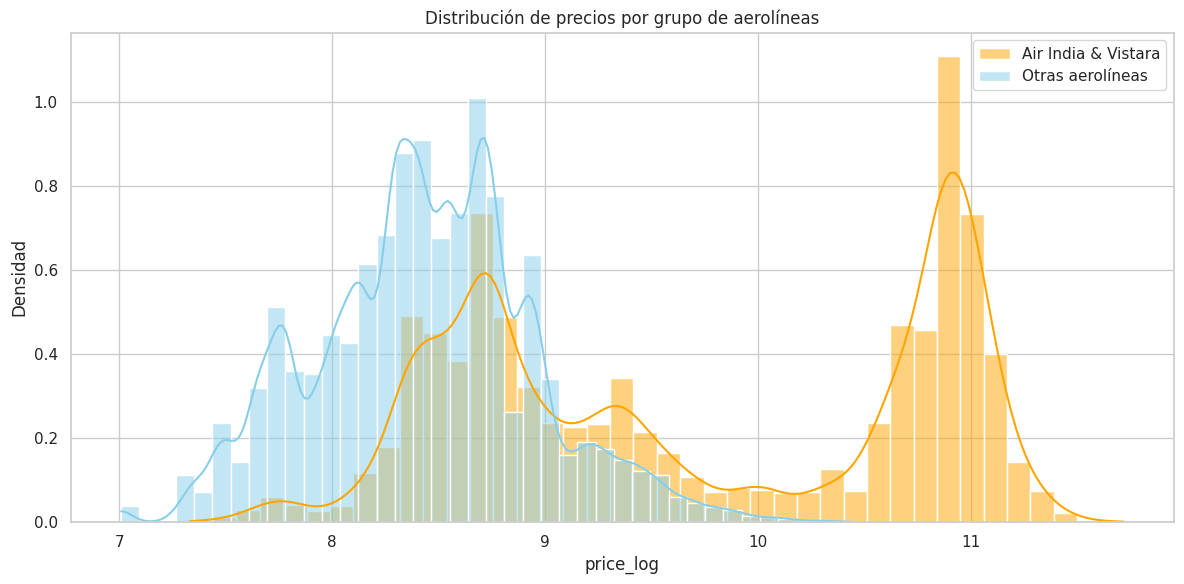

In [213]:
grupo_especial = data_unified[data_unified['airline'].isin(['Air India', 'Vistara'])]
grupo_otros = data_unified[~data_unified['airline'].isin(['Air India', 'Vistara'])]

grupo_especial['price_log'] = np.log1p(grupo_especial['price'])
grupo_otros['price_log'] = np.log1p(grupo_otros['price'])

# Estilo de gráfico
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(12, 6))

# Histograma y KDE para Air India & Vistara
sns.histplot(grupo_especial['price_log'], kde=True, stat="density", label='Air India & Vistara', color='orange', bins=40, alpha=0.5)

# Histograma y KDE para otras aerolíneas
sns.histplot(grupo_otros['price_log'], kde=True, stat="density", label='Otras aerolíneas', color='skyblue', bins=40, alpha=0.5)

# Títulos y etiquetas
plt.title('Distribución de precios por grupo de aerolíneas')
plt.xlabel('price_log')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

aca se puede evidenciar que las aerolines Air India y Vistara son las responsables de los tiquetes más costosos, pero tambien tienen una oferta de tiquetes economicos lo cual se acomoda a la campana de la izquierda

Investigando diferentes gráficas no se puede establecer una

# **Punto 6 | Función Pretratamiento**



---



In [214]:
def procesar_datos(df):
    df = df.copy()  # Para no modificar el original

    #Corregir Precios Indios
    df['price'] = df['price'].astype(str).str.replace(',', '', regex=True)
    df['price'] = df['price'].fillna(0).astype(int)

    # Corregir Time Taken
    df['time_taken'] = df['time_taken'].astype(str).str.replace('m', '', regex=True)
    df['minutos'] = df['time_taken'].str.split('h').str[-1]
    df['horas'] = df['time_taken'].str.split('h').str[0]
    df['minutos'] = df['minutos'].str.strip().replace('', '0')
    df['minutos'] = df['minutos'].fillna(0).astype(float).round(0).astype('int64')
    df['horas'] = df['horas'].fillna(0).astype(float).round(0).astype('int64')
    df['time_taken'] = df['horas'] * 60 + df['minutos']
    df.drop(['horas','minutos'], axis=1, inplace=True)

    # Corregir 'dep_time & arr_time' to datetime64[ns]
    df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M:%S')
    df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M:%S')

    # Corregir 'stop' colum to stop integer & city

    df['stop_clean'] = df['stop'].str.extract(r'^(non-stop|1-stop|2\+-stop)')
    df['stop_city'] = df['stop'].str.extract(r'Via\s+([A-Za-z\s]+)')
    df['stop_city'] = df['stop_city'].str.split(r'\s|\n').str[0]

    def ciudad_a_iata(ciudad):
      if isinstance(ciudad, str):
        return city_to_iata.get(ciudad.strip().lower(), ciudad)
      else:
          return ciudad
    df['stop_city_cod'] = df['stop_city'].apply(ciudad_a_iata)

    nombres_a_siglas = {
        "Delhi": "DEL",
        "Nagpur": "NAG",
        "Surat": "URT",
        "Vishakhapatnam": "VTZ",
        "Kolhapur": "KLH"
        }
    df['stop_city'] = df['stop_city_cod'].apply(
    lambda x: nombres_a_siglas[x] if len(str(x)) != 3 and x in nombres_a_siglas else x)
    df['stop_city'] = df['stop_city'].fillna('NoStop')

    df['from_cod'] = df['from'].apply(ciudad_a_iata)
    df['from'] = df['from_cod'].apply(
    lambda x: nombres_a_siglas[x] if len(str(x)) != 3 and x in nombres_a_siglas else x)
    df['to_cod'] = df['to'].apply(ciudad_a_iata)
    df['to'] = df['to_cod'].apply(
    lambda x: nombres_a_siglas[x] if len(str(x)) != 3 and x in nombres_a_siglas else x)
    df.drop(['stop_city_cod','from_cod','to_cod','stop','ch_code','num_code'], axis=1, inplace=True)

    mapeo_stops = {
        'non-stop': 0,
        '1-stop': 1,
        '2+-stop': 2
        }
    df['stop'] = df['stop_clean'].map(mapeo_stops)
    df.drop(['stop_clean'], axis=1, inplace=True)

    # --- 6. Manejo de valores nulos ---
    df.dropna(inplace=True)

    return df

In [215]:
data_test = economy_data_o.copy()
data_test = procesar_datos(data_test)
data_test.head()

,date,airline,dep_time,from,time_taken,arr_time,to,price,stop_city,stop
0,2022-02-11,SpiceJet,1900-01-01 18:55:00,DEL,130,1900-01-01 21:05:00,BOM,5953,NoStop,0
1,2022-02-11,SpiceJet,1900-01-01 06:20:00,DEL,140,1900-01-01 08:40:00,BOM,5953,NoStop,0
2,2022-02-11,AirAsia,1900-01-01 04:25:00,DEL,130,1900-01-01 06:35:00,BOM,5956,NoStop,0
3,2022-02-11,Vistara,1900-01-01 10:20:00,DEL,135,1900-01-01 12:35:00,BOM,5955,NoStop,0
4,2022-02-11,Vistara,1900-01-01 08:50:00,DEL,140,1900-01-01 11:10:00,BOM,5955,NoStop,0


# **Punto 7 | Modelos**



---



In [217]:
from sklearn.model_selection import train_test_split

X = data_unified_encoded.drop(['price','price_log','date','dep_time', 'arr_time'], axis=1)
y = data_unified_encoded['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inicializar modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(50*"-")
    print(f"📊 {name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}\n")
print(50*"-")

--------------------------------------------------
📊 Linear Regression
RMSE: 0.92
MAE: 0.8035
R2 Score: 0.3122

--------------------------------------------------
📊 Random Forest
RMSE: 0.86
MAE: 0.7092
R2 Score: 0.4066

--------------------------------------------------
📊 Gradient Boosting
RMSE: 0.90
MAE: 0.7849
R2 Score: 0.3409

--------------------------------------------------


# **Punto 8 | Grilla Hiperparámetros**



---



In [225]:
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'positive': [True, False]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}

In [226]:
from sklearn.model_selection import  GridSearchCV
import joblib

# 3. Entrenamiento y búsqueda de hiperparámetros
best_models = {}

for name in models:
    print(f"🔍 Optimizing {name}...")
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_models[name] = best_model

    # 4. Evaluación
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"✅ {name} MSE: {mse:.4f}")

    # 5. Guardar modelo
    joblib.dump(best_model, f'{name}_model.pkl')
    print(f"💾 Modelo guardado como {name}_model.pkl\n")


🔍 Optimizing Linear Regression...
✅ Linear Regression MSE: 0.8482
💾 Modelo guardado como Linear Regression_model.pkl

🔍 Optimizing Random Forest...
✅ Random Forest MSE: 0.7314
💾 Modelo guardado como Random Forest_model.pkl

🔍 Optimizing Gradient Boosting...
✅ Gradient Boosting MSE: 0.7815
💾 Modelo guardado como Gradient Boosting_model.pkl



# **Punto 9 | Métricas Evaluación**



---



✅ 3 métricas de evaluación

* ***RMSE*** (Root Mean Squared Error)	Penaliza errores grandes (sensibles a outliers)
* ***MAE*** (Mean Absolute Error)	Promedio de errores absolutos
* ***R²*** (Coeficiente de determinación)	Proporción de varianza explicada

In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

results = []

for name, model in best_models.items():
    y_pred_log = model.predict(X_test)
    y_true_log = y_test

    # Métricas en el espacio logarítmico
    rmse = np.sqrt(mean_squared_error(y_true_log, y_pred_log))
    mae = mean_absolute_error(y_true_log, y_pred_log)
    r2 = r2_score(y_true_log, y_pred_log)

    results.append({'Modelo': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

In [228]:
y_baseline = [y_train.mean()] * len(y_test)

baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))
baseline_mae = mean_absolute_error(y_test, y_baseline)
baseline_r2 = r2_score(y_test, y_baseline)

results.append({'Modelo': 'Baseline', 'RMSE': baseline_rmse, 'MAE': baseline_mae, 'R2': baseline_r2})


,Modelo,RMSE,MAE,R2
1,Random Forest,0.855193,0.709364,4.068997e-01
2,Gradient Boosting,0.884005,0.765057,3.662623e-01
0,Linear Regression,0.920968,0.803536,3.121570e-01
3,Baseline,1.110453,0.971794,-7.908325e-07


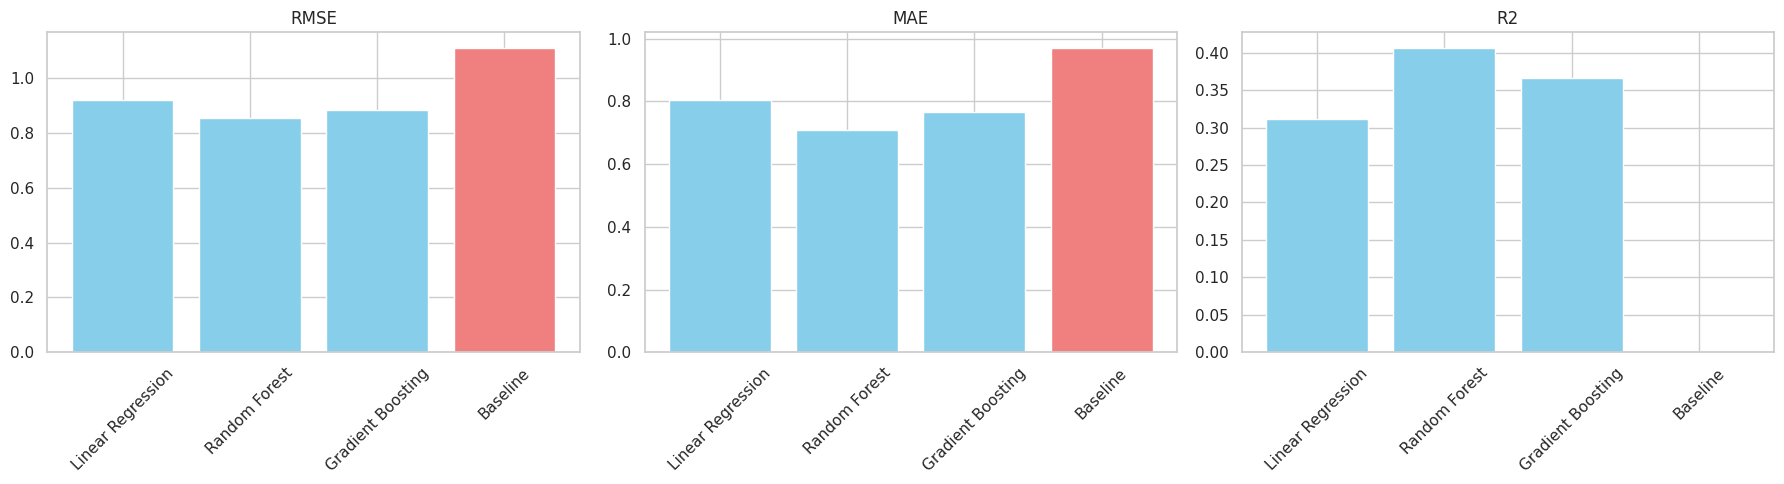

In [229]:
result_df = pd.DataFrame(results)
display(result_df.sort_values('RMSE'))

# Gráfico de comparación
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['RMSE', 'MAE', 'R2']
colors = ['skyblue' if m != 'Baseline' else 'lightcoral' for m in result_df['Modelo']]

for i, metric in enumerate(metrics):
    ax[i].bar(result_df['Modelo'], result_df[metric], color=colors)
    ax[i].set_title(metric)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **Punto 10 | Conclusiones**



---



## Mejor Modelo:  **🌳Random Forest**
Logrando un RMSE de 0.855, un MAE de 0.709 y un R² de 0.41. Esto representa una mejora significativa respecto al modelo de baseline, cuyo desempeño es notablemente inferior, con un R² prácticamente nulo (-0.0000008) y errores mayores en ambas métricas.

Aunque Gradient Boosting también muestra buen desempeño, sus métricas son ligeramente inferiores a las de Random Forest. Por otro lado, el modelo de Regresión Lineal fue el menos efectivo entre los modelos aprendidos, lo que sugiere que el problema no es lineal y requiere modelos más complejos capaces de capturar relaciones no lineales y posibles interacciones entre variables.